<hr style="height: 1px;">
<i>This notebook was authored by the 8.S50x Course Team, Copyright 2022 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

<h1>Lesson 10: Bayesian Statistics and Likelihood</h1>


<a name='section_10_0'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L10.0 Overview</h2>


<h3>Navigation</h3>

<table style="width:100%">
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_10_1">L10.1 Definition of Convolution</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_10_1">L10.1 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_10_2">L10.2 Example of Convolutions with Different Functions</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_10_2">L10.2 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_10_3">L10.3 Prior and Posterior Probabilities and Bayes Theorem</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_10_3">L10.3 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_10_4">L10.4 Bayesian vs. Frequentist and Likelihood</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_10_4">L10.4 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_10_5">L10.5 Bayesian vs. Frequentist Fitting Example</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_10_5">L10.5 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_10_6">L10.6 Maximum Likelihood</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_10_6">L10.6 Exercises</a></td>
    </tr>
</table>



<h3>Learning Objectives</h3>

This lesson covers several fundamental concepts in probability theory, including convolution, prior and posterior probabilities, Bayes theorem, Bayesian vs. frequentist approaches to statistics, and maximum likelihood.

Convolution is defined as the integration of two functions to produce a third function which describes what happens when the two functions combine to produce a modified output. This lesson presents examples of convolutions using different functions and explains how the convolution theorem can simplify the calculation of convolutions.

We then discuss the concepts of prior and posterior probabilities and the Bayes theorem, which is a fundamental concept in Bayesian statistics. The differences between Bayesian and frequentist approaches to statistics are explained, along with the role of likelihood in Bayesian inference.

Finally, we introduce the relationship between likelihood and probability.

<h3>Importing Libraries</h3>

Before beginning, run the cell below to import the relevant libraries for this notebook.


In [2]:
#>>>RUN: L10.0-runcell00

#install lmfit if you have not done so
!pip install lmfit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.7 MB/s eta 0:00:00


In [3]:
#>>>RUN: L10.0-runcell01

import numpy as np                #https://numpy.org/doc/stable/
import lmfit                      #https://lmfit.github.io/lmfit-py/
import matplotlib.pyplot as plt   #https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html
from scipy import stats           #https://docs.scipy.org/doc/scipy/reference/stats.html

<h3>Setting Default Figure Parameters</h3>

The following code cell sets default values for figure parameters.


In [4]:
#>>>RUN: L10.0-runcell02

#set plot resolution
%config InlineBackend.figure_format = 'retina'

#set default figure parameters
plt.rcParams['figure.figsize'] = (9,6)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)    # figure title


<a name='section_10_1'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L10.1 Definition of Convolution</h2>  

| [Top](#section_10_0) | [Previous Section](#section_10_0) | [Exercises](#exercises_10_1) | [Next Section](#section_10_2) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.2x+1T2025/block-v1:MITxT+8.S50.2x+1T2025+type@sequential+block@seq_LS10/block-v1:MITxT+8.S50.2x+1T2025+type@vertical+block@vert_LS10_vid1" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Overview</h3>

Convolutions are a critical component of every good statistical analysis. They are a way to merge distributions together to determine what happens when there are two or more different effects combining to give a final result. Let's build convolutions up by scratch and then go from there.  

The core concept of a convolution is that you are effectively multiplying distributions. Given two functions $f(x)$ and $g(x)$, we can define their convolution by:


$$
\begin{eqnarray}
(f*g)(z) &=& \int^{\infty}_{-\infty} f(z-t)g(t)dt
\end{eqnarray}
$$

For data analysis, we usually think about this in the context of probability distributions $g$ and $f$. From these two, we construct a new probability distribution $(f*g)$. Let's take a look at how it works.

To do this, let's first define some functions to convolve.

In [5]:
#>>>RUN: L10.1-runcell01

#First let's define a triangular distribution
def triangle(x,mean=5):
    Norm=mean*mean
    val=np.where(x <= mean,np.maximum(x,np.zeros(len(x))), np.maximum(2*mean-x,np.zeros(len(x))))
    return val/Norm

#Now define the gaussian
def gaussian(x,mean=0,sigma=1):
    return 1./(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * sigma**2))


In [6]:
#>>>RUN: L10.1-runcell02

#Now let's do a convolution by hand
def convolve(f1,f2,x,sigma=1,iMin=-10,iMax=10,iN=2000):
    step=(iMax-iMin)/iN
    pInt=0
    for i0 in range(iN):
            pX   = np.repeat(i0*step+iMin,len(x))
            pVal = f1(x-pX,sigma=sigma)*f2(pX)
            pInt += pVal*step
    return pInt

#You could consider how the choice of iMin, iMax, and iN affect the output

The plots generated with the code below show convolutions of the same triangular function with two different Gaussian functions, one of which has a width that is 5 times larger than the other one. Only the narrower Gaussian is shown in the figure.

As you can see, the convolution with the narrower Gaussian makes only minor modifications to the triangular shape, while the convolution with a wide Gaussian shows little evidence of any influence from the triangular component.

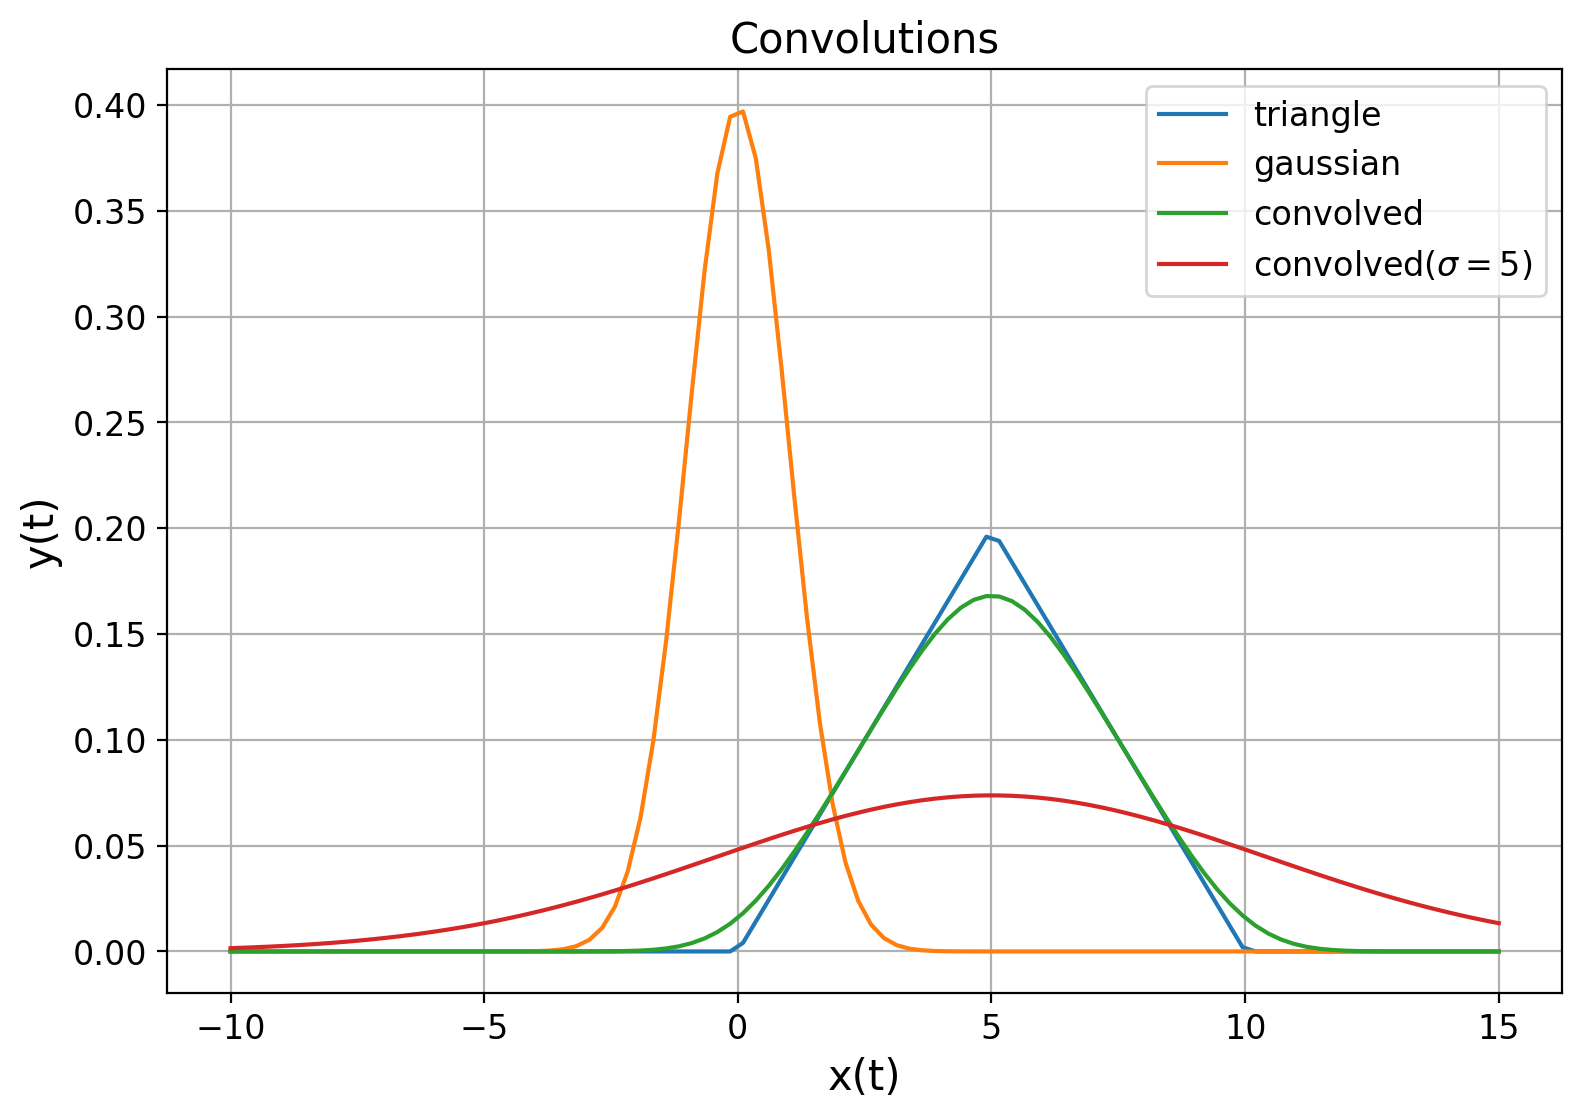

In [7]:
#>>>RUN: L10.1-runcell03

#now let's plot
fig, ax = plt.subplots()
x_in=np.linspace(-10, 15, 100)
tri_out=triangle(x_in)
gaus_out=gaussian(x_in)
conv1_out=convolve(gaussian,triangle,x_in)
conv2_out=convolve(gaussian,triangle,x_in,sigma=5)

ax.plot(x_in,tri_out,label='triangle')
ax.plot(x_in,gaus_out,label='gaussian')
ax.plot(x_in,conv1_out,label='convolved')
ax.plot(x_in,conv2_out,label='convolved($\sigma=5$)')
ax.set(xlabel='x(t)', ylabel='y(t)',title='Convolutions')
ax.grid()
plt.legend()
plt.show()

Now, let's compare the original wide Gaussian with the convolution. Adding the triangle does make a difference, but the overall shape is clearly dominated by the wide Gaussian.

These two examples show how the influence of the different components used in a convolution can vary depending on their shapes, especially their relative widths.

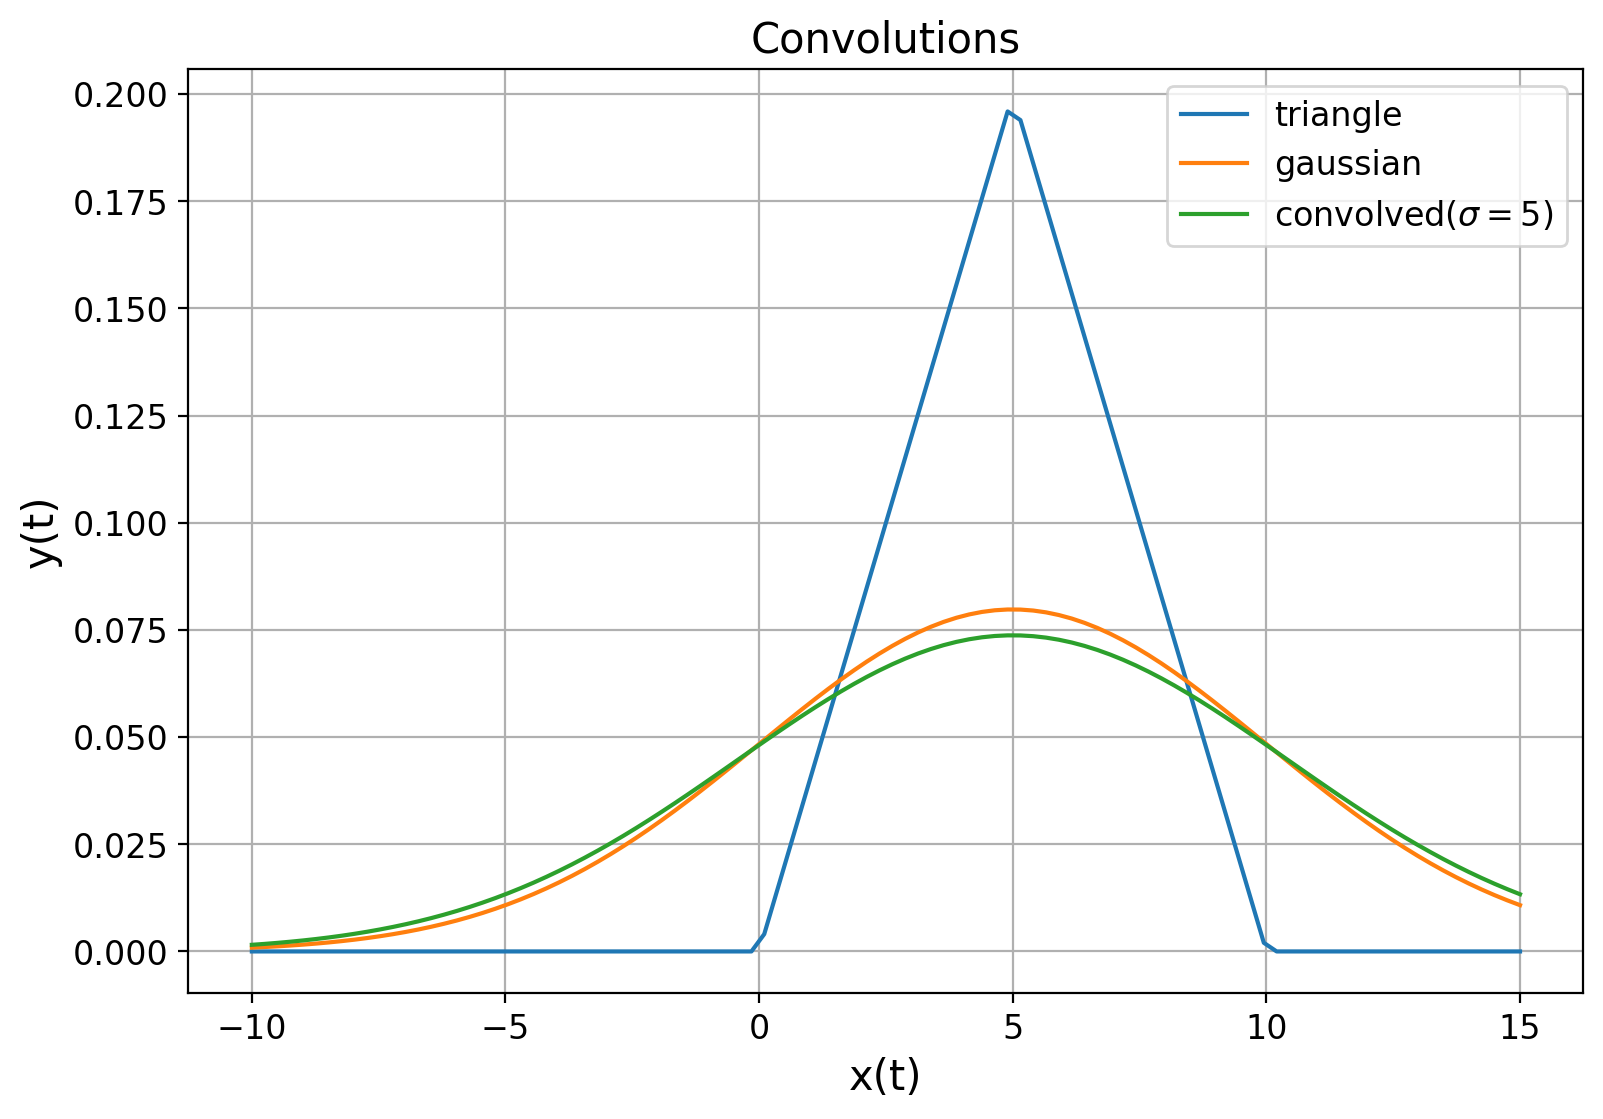

In [8]:
#>>>RUN: L10.1-runcell04

#now let's plot the convolved and original wide Gaussian
fig, ax = plt.subplots()
x_in=np.linspace(-10, 15, 100)
tri_out=triangle(x_in)
gaus_out=gaussian(x_in,5,5)
conv2_out=convolve(gaussian,triangle,x_in,sigma=5)

ax.plot(x_in,tri_out,label='triangle')
ax.plot(x_in,gaus_out,label='gaussian')
ax.plot(x_in,conv2_out,label='convolved($\sigma=5$)')
ax.set(xlabel='x(t)', ylabel='y(t)',title='Convolutions')
ax.grid()
plt.legend()
plt.show()

<a name='exercises_10_1'></a>     

| [Top](#section_10_0) | [Restart Section](#section_10_1) | [Next Section](#section_10_2) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-10.1.1</span>

What happens if you convolve a Gaussian with a straight line: $y=x$? Complete the code below to define convolutions for two different values of sigma, using the previously defined functions 'gaussian' and 'convolve'. Then plot in your notebook.

Afterwards, consider the following: What happens to the value of the convolved function at $x=0$? What happens if you increase the width of the Gaussian?

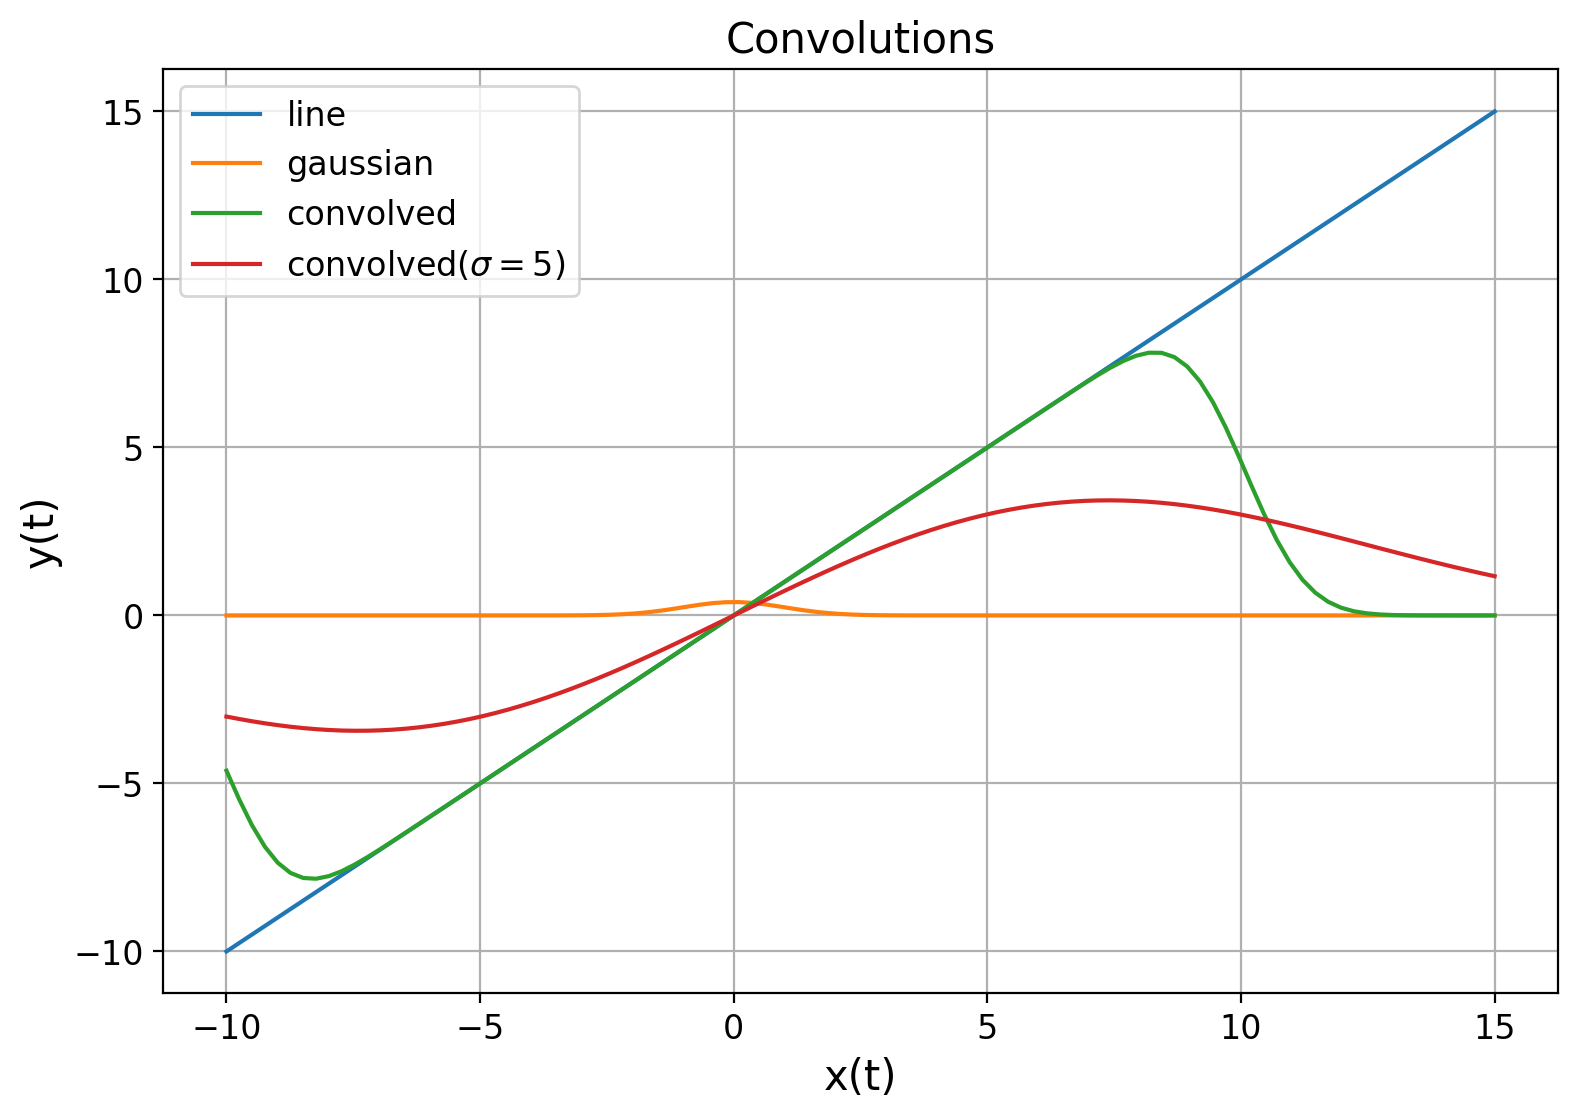

In [9]:
#>>>EXERCISE: L10.1.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

#defining a linear function
def line(x):
    #YOUR CODE HERE
    return x

#creating the convolution
x_in=np.linspace(-10, 15, 100) #MUST USE THIS INPUT ARRAY FOR ANSWER CHECKER
conv1_out = convolve(gaussian,line,x_in) # use a gaussian with default mean and sigma
conv2_out = convolve(gaussian,line,x_in,sigma=5) # use a gaussian with default mean and sigma=5


#creating plots and comparing to the original functions
fig, ax = plt.subplots()

line_out=line(x_in)
gaus1_out=gaussian(x_in)

ax.plot(x_in,line_out,label='line')
ax.plot(x_in,gaus1_out,label='gaussian')
ax.plot(x_in,conv1_out,label='convolved')
ax.plot(x_in,conv2_out,label='convolved($\sigma=5$)')
ax.set(xlabel='x(t)', ylabel='y(t)',title='Convolutions')
ax.grid()
plt.legend()
plt.show()

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-10.1.2</span>

What happens if you convolve a Gaussian with a Gaussian? Complete the code below to define convolutions for two different values of sigma, again using the previously defined functions 'gaussian' and 'convolve'. Then plot in your notebook.

As an extra, consider the following questions:

- What is the functional form of the convolution?
- What happens to the value of the convolved function at $x=0$?
- What happens if you change the width of one or both of the Gaussians?

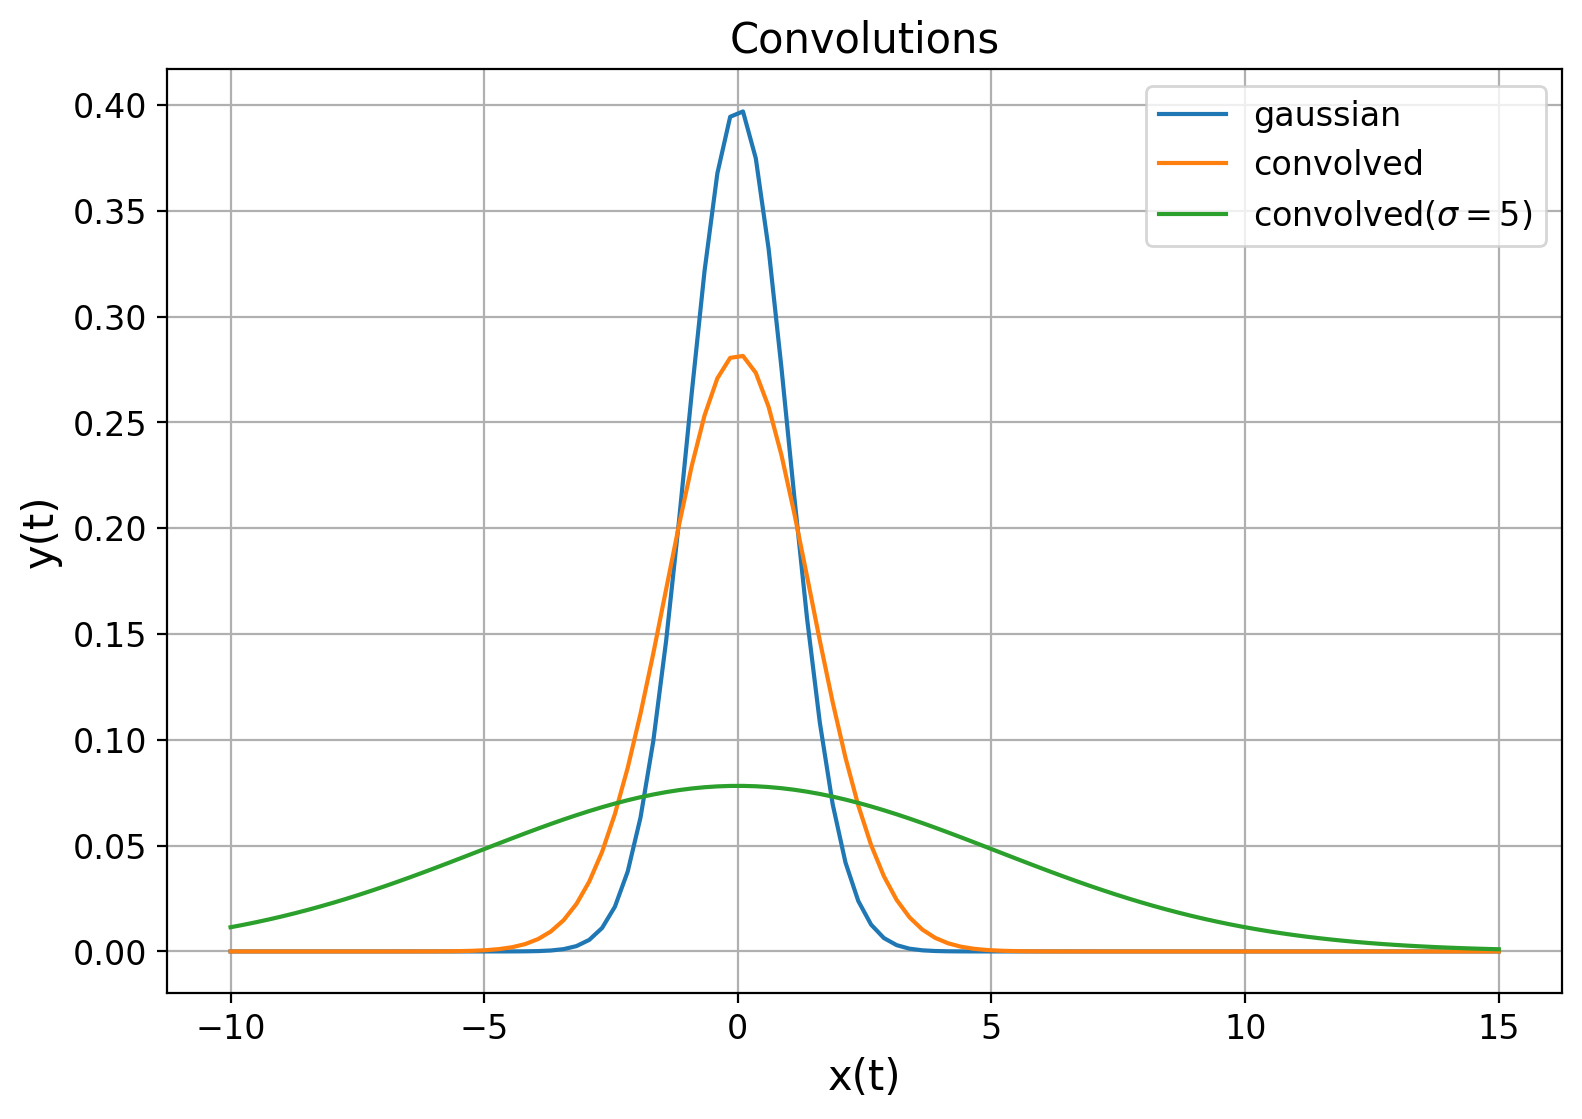

In [10]:
#>>>EXERCISE: L10.1.2
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

#creating the convolution
x_in=np.linspace(-10, 15, 100) #MUST USE THIS INPUT ARRAY FOR ANSWER CHECKER
conv1_out = convolve(gaussian,gaussian,x_in) # use a gaussian with default mean and sigma
conv2_out = convolve(gaussian,gaussian,x_in,sigma=5) # use a gaussian with default mean and sigma=5


#creating plots and comparing to the original functions
fig, ax = plt.subplots()

gaus1_out=gaussian(x_in)

ax.plot(x_in,gaus1_out,label='gaussian')
ax.plot(x_in,conv1_out,label='convolved')
ax.plot(x_in,conv2_out,label='convolved($\sigma=5$)')
ax.set(xlabel='x(t)', ylabel='y(t)',title='Convolutions')
ax.grid()
plt.legend()
plt.show()

<a name='section_10_2'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L10.2 Example of Convolutions with Different Functions</h2>  

| [Top](#section_10_0) | [Previous Section](#section_10_1) | [Exercises](#exercises_10_2) | [Next Section](#section_10_3) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.2x+1T2025/block-v1:MITxT+8.S50.2x+1T2025+type@sequential+block@seq_LS10/block-v1:MITxT+8.S50.2x+1T2025+type@vertical+block@vert_LS10_vid2" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

### Challenge question (worked example)

What does $f(x)=\sin(x)$ convolved with a Gaussian look like? How about $f(x)=\sin(x)x$? How do they change with the width of the Gaussian?

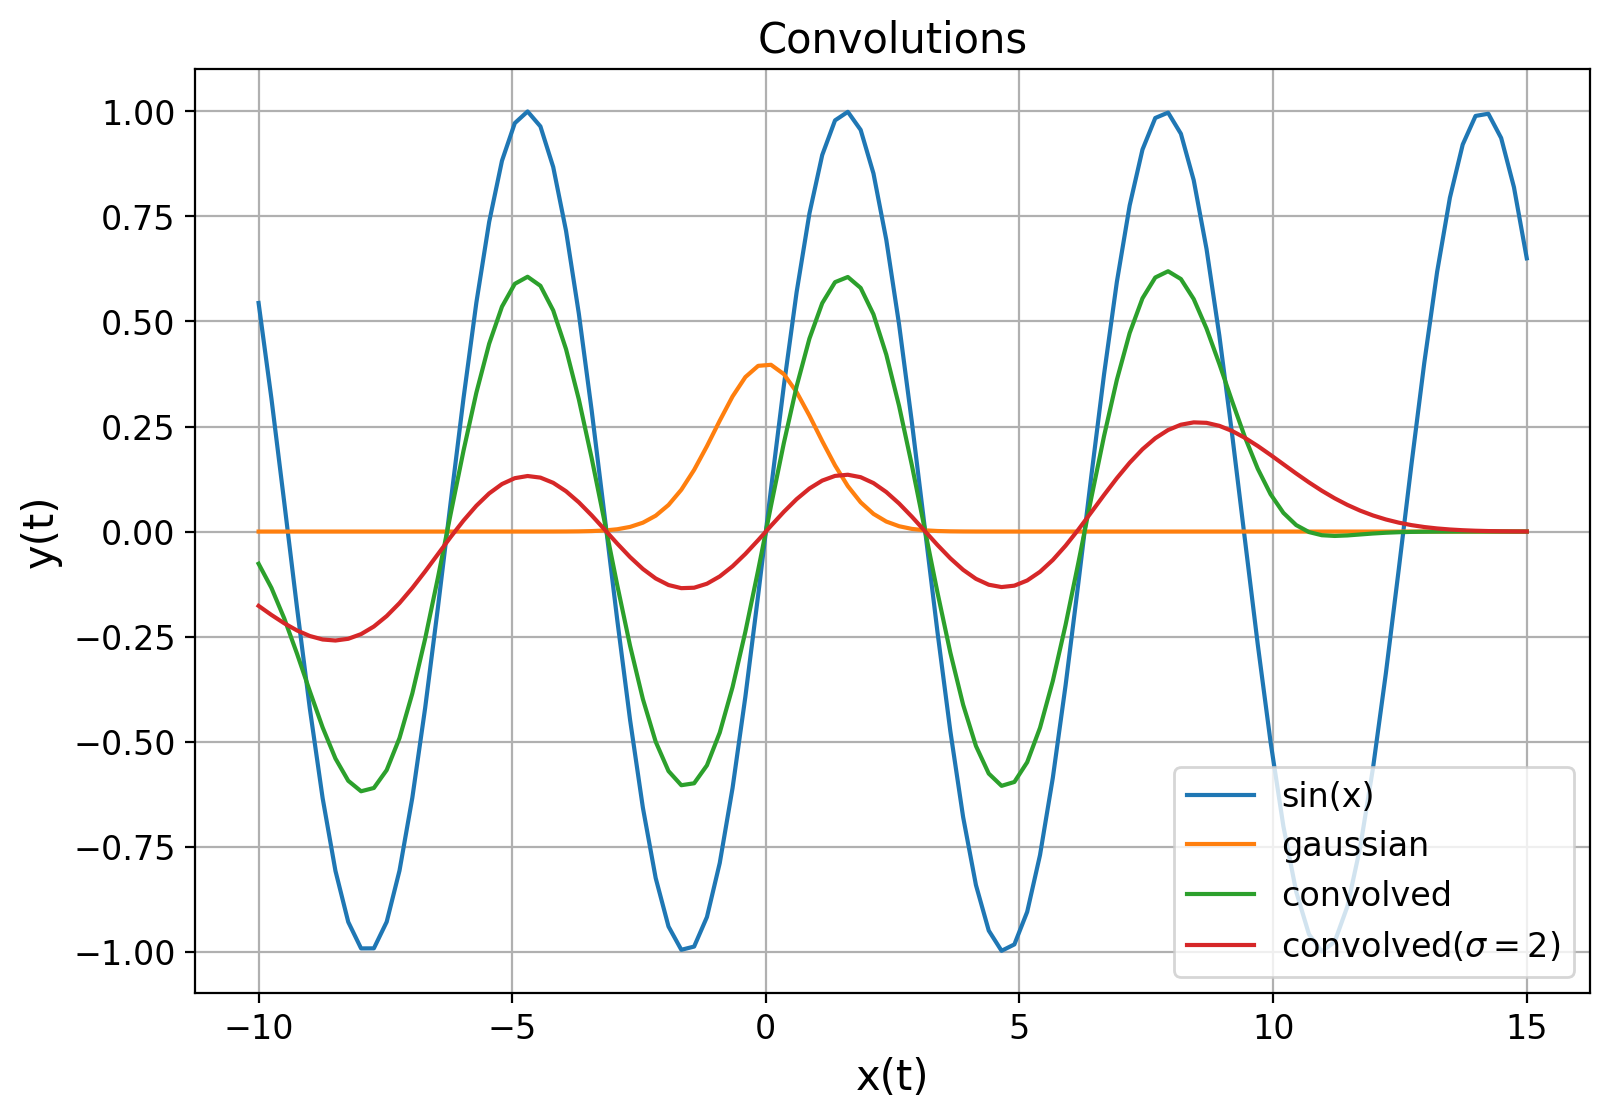

In [11]:
#>>>RUN: L10.2-runcell01

def func_1(x):
    return np.sin(x)

#this plots functions with two gaussians of different width
def plot_convolutions_with_gaussian(func_in,x,func_name):
    func_out=func_in(x)
    gaus_out=gaussian(x)
    conv1_out=convolve(gaussian,func_in,x)
    conv2_out=convolve(gaussian,func_in,x,sigma=2)

    fig, ax = plt.subplots()
    ax.plot(x,func_out,label=func_name)
    ax.plot(x,gaus_out,label='gaussian')
    ax.plot(x,conv1_out,label='convolved')
    ax.plot(x,conv2_out,label='convolved($\sigma=2$)')
    ax.set(xlabel='x(t)', ylabel='y(t)',title='Convolutions')
    ax.grid()
    plt.legend()
    plt.show()


#now let's plot
x_in=np.linspace(-10, 15, 100)
plot_convolutions_with_gaussian(func_1,x_in,'sin(x)')

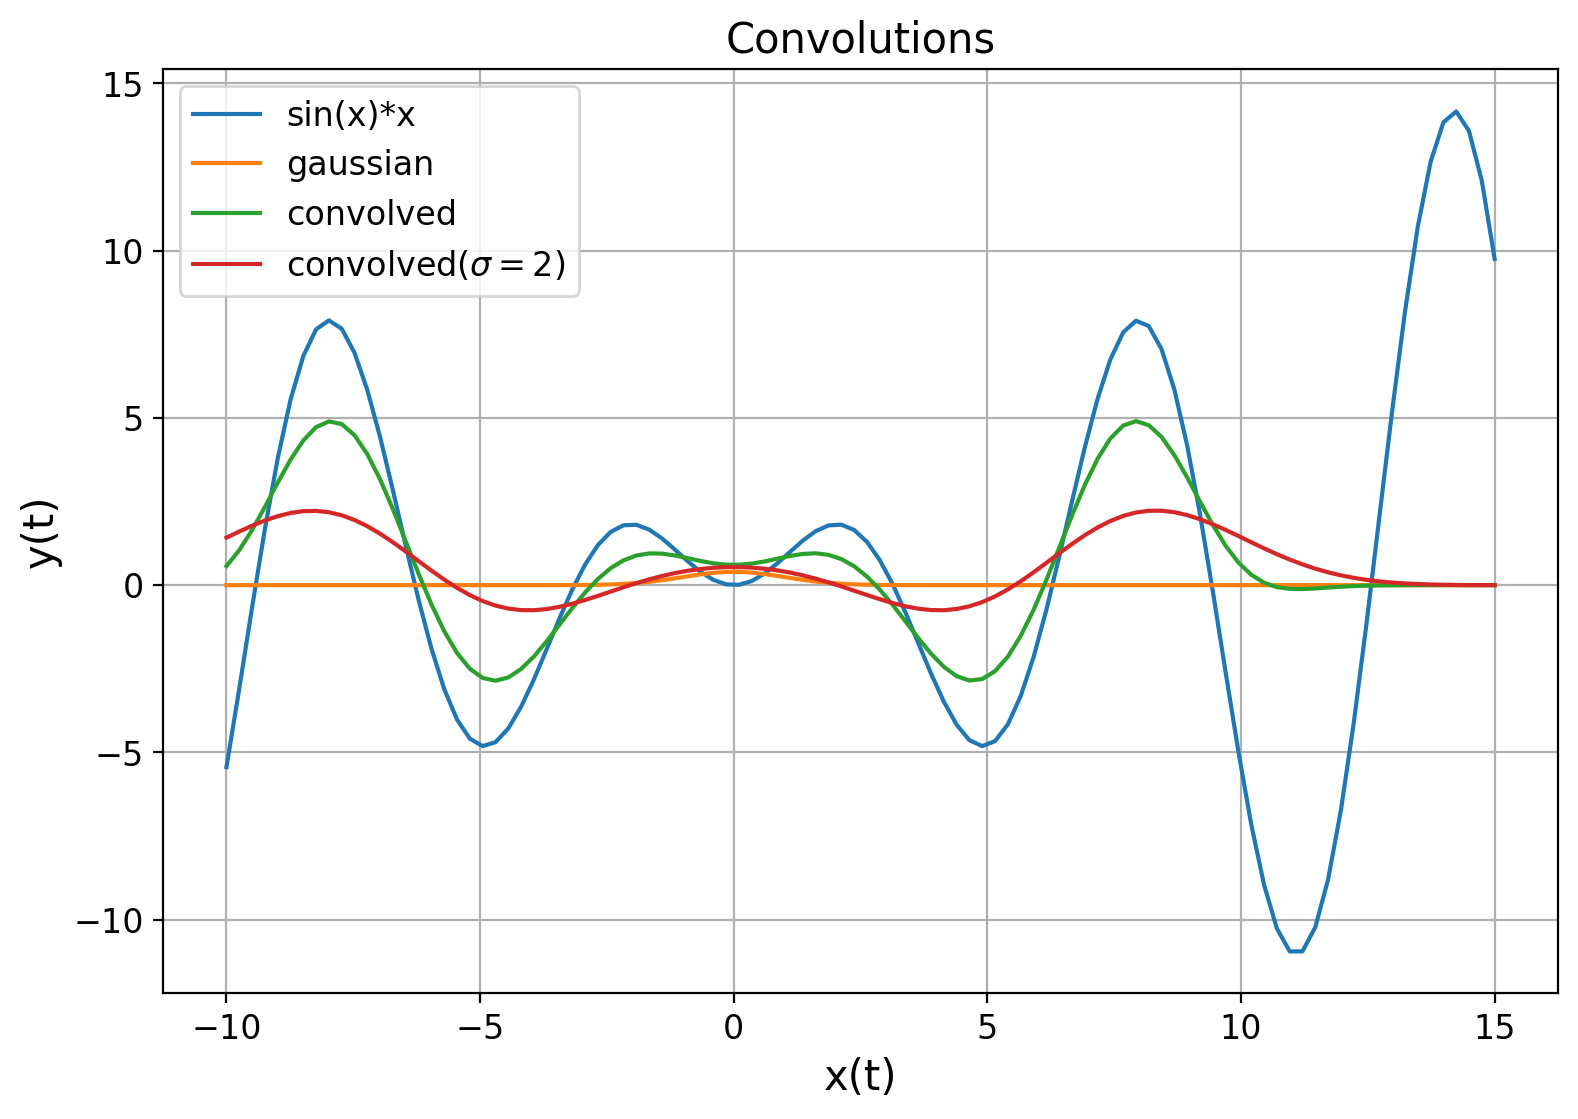

In [12]:
#>>>RUN: L10.2-runcell02

def func_2(x):
    return np.sin(x)*x


#now let's plot
x_in=np.linspace(-10, 15, 100)
plot_convolutions_with_gaussian(func_2,x_in,'sin(x)*x')

### Other Examples

Here are some examples of simple mathematical convolutions, which you can try on your own:

**Rectangular pulse:** The convolution of two rectangular pulses (i.e. functions that have a constant non-zero value only within a certain range in x) is a triangular pulse. This is a common example used to illustrate the concept of convolution.

**Exponential function:** The convolution of an exponential function with a rectangular pulse is a function that starts at zero, rises to a maximum, and then decays exponentially. This is a common example used in signal processing.

**Sine and cosine functions:** The convolution of a sine function with a cosine function is a sine function with a phase shift. This is an important result in Fourier analysis.

**Gaussian function:** The convolution of a Gaussian function with itself is another Gaussian function. This is a property of the Gaussian distribution and is used in many applications, including image processing and signal smoothing.

<a name='exercises_10_2'></a>     

| [Top](#section_10_0) | [Restart Section](#section_10_2) | [Next Section](#section_10_3) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-10.2.1</span>

Often we use convolutions to "smear" our distributions analytically, without having to build a simulation. In the code below we sample points from a Gaussian. Take the original function below (a box distribution), add points sampled by a Gaussian, and show that the distribution matches the convolution.

Specifically, complete the array `smeared_x_in`, which adds `x_in` and `smeared`. Then complete the array `smeared_box_out`, which takes the average of the smeared values from `func_box` evaluated at the `smeared_x_in` points. Only complete tese arrays in the answer checker, then run the code in your notebook to generate plots.

To clearly see that the distributions match, try changing which of `smeared_box_out` and `conv_out` gets plotted first, or just comment out one and then the other. The two should be identical, which means that you only see the one which is plotted second.

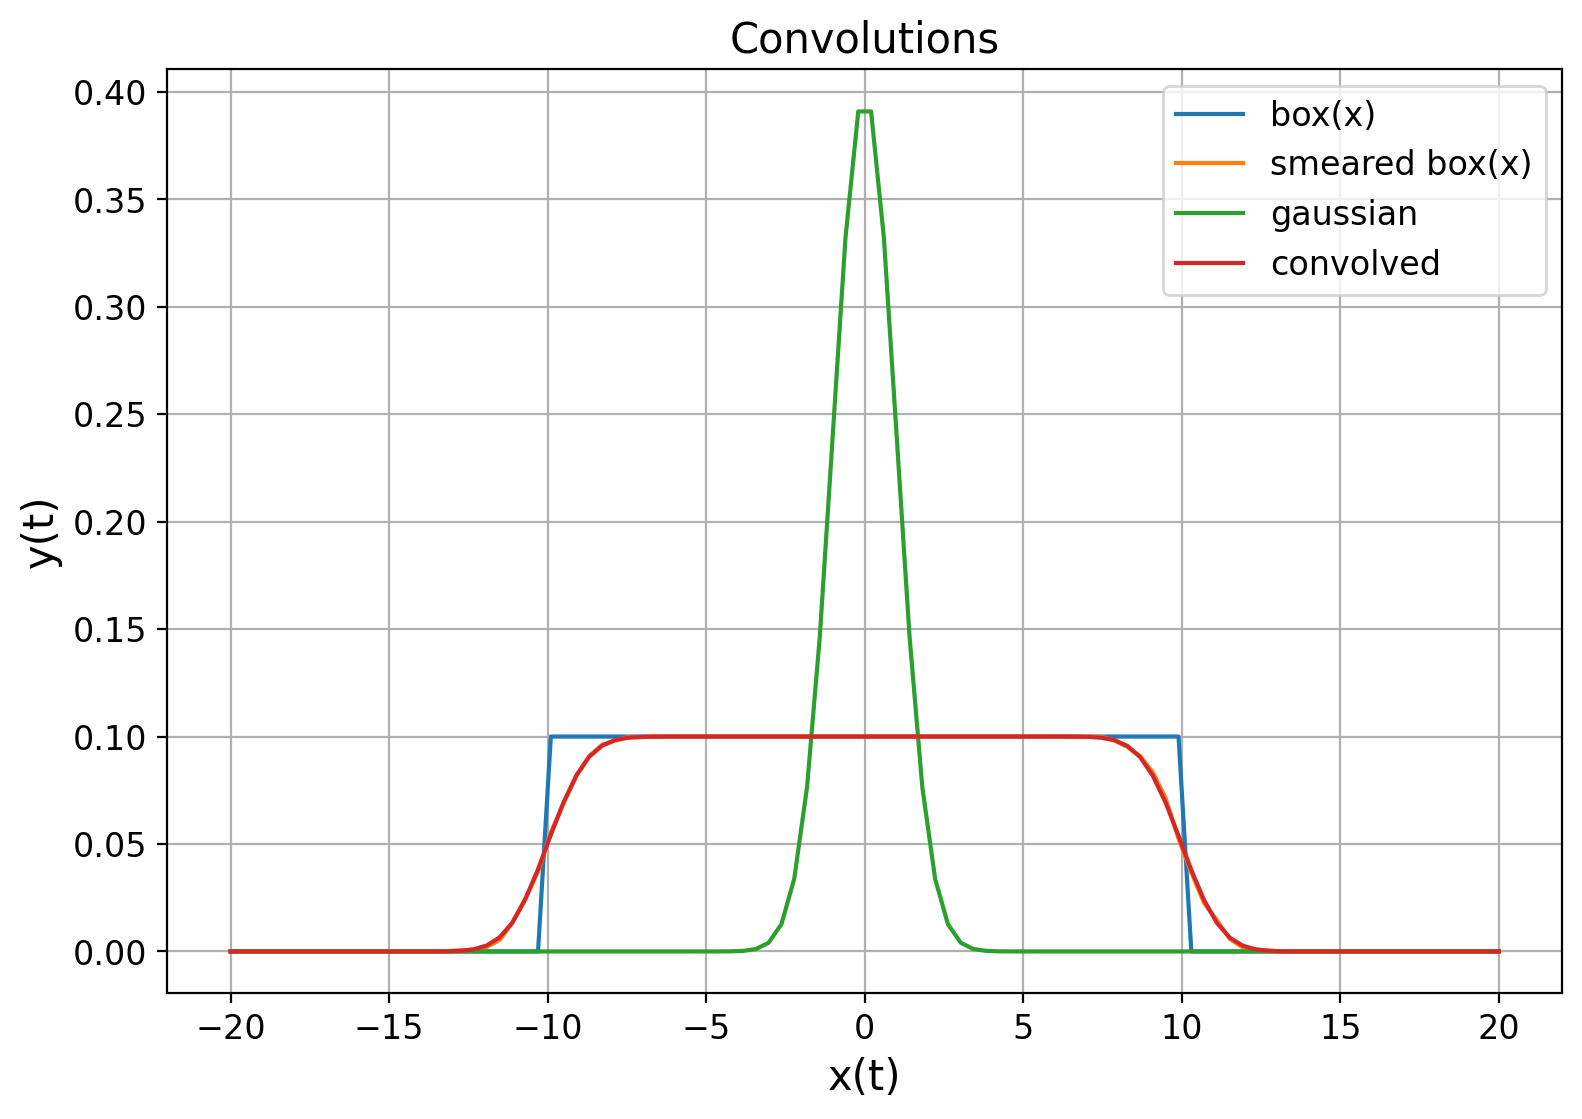

In [13]:
#>>>EXERCISE: L10.2.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

np.random.seed(10)

#define a box function
def func_box(x):
    return 0+0.1*np.where(x < -10,0,1) - 0.1*np.where(x < 10,0,1)

lNToys=1000
nbins=100
sigma=1
smeared=np.random.normal(0,sigma,(lNToys,nbins))
x_in=np.linspace(-20, 20, nbins)

#add the smeared signal to x_in, make 1000 example x distributions from above
smeared_x_in= x_in+smeared

#average over 1000 sampled distributions
smeared_box_out= np.average(func_box(smeared_x_in), axis=0)


#PLOT
#-------------
#now let's plot
fig, ax = plt.subplots()
x_in=np.linspace(-20, 20, 100)

#various functions to add to the final plot
box_out=func_box(x_in)
gaus_out=gaussian(x_in)
conv_out=convolve(gaussian,func_box,x_in)

#make final plot
ax.plot(x_in,box_out,label='box(x)')
ax.plot(x_in,smeared_box_out,label='smeared box(x)')
ax.plot(x_in,gaus_out,label='gaussian')
ax.plot(x_in,conv_out,label='convolved')
ax.set(xlabel='x(t)', ylabel='y(t)',title='Convolutions')
ax.grid()
plt.legend()
plt.show()


<a name='section_10_3'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L10.3 Prior and Posterior Probabilities and Bayes Theorem</h2>  

| [Top](#section_10_0) | [Previous Section](#section_10_2) | [Exercises](#exercises_10_3) | [Next Section](#section_10_4) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.2x+1T2025/block-v1:MITxT+8.S50.2x+1T2025+type@sequential+block@seq_LS10/block-v1:MITxT+8.S50.2x+1T2025+type@vertical+block@vert_LS10_vid3" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Slides</h3>

Run the code below to view the slides for this section, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L10/slides_L10_03.html" target="_blank">HERE</a>.

In [14]:
#>>>RUN: L10.3-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L10/slides_L10_03.html', width=970, height=550)

<h3>What is a measurement?</h3>

Let's say we have a measurement of some parameter $x$, and this measurement behaves like a Gaussian about some mean point with width $\sigma=1$. Let's plot this measurement (in this case, we set the mean to be 0).   

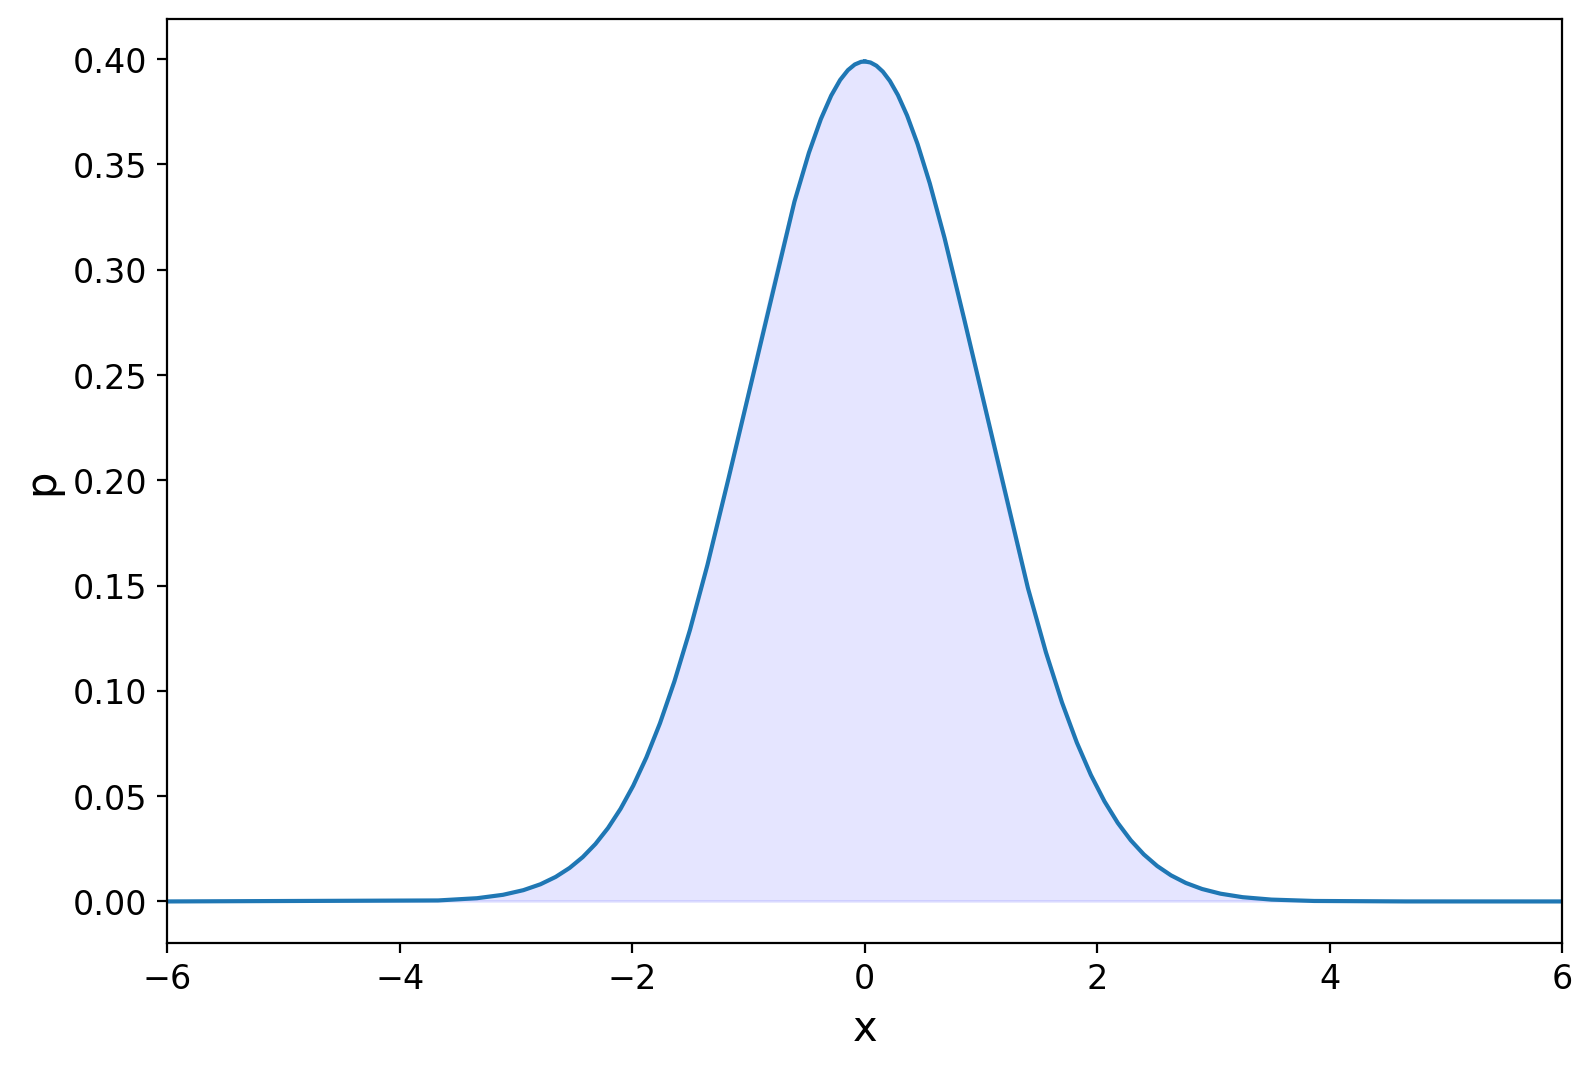

In [15]:
#>>>RUN: L10.3-runcell01

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Our measurement probability
def gaus(mu=0,sigma=1):
    x = np.arange(-10, 10, 0.001)
    y = stats.norm.pdf(x,mu,sigma)
    return x,y

#a quick plot of what we expect the measurement to be
def plotgaus():
    x,y=gaus(0,1)
    fig, ax = plt.subplots(figsize=(9,6))
    plt.style.use('fast')
    ax.plot(x,y)
    ax.fill_between(x,y,0, alpha=0.1, color='b')
    ax.set_xlim([-6,6])
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    plt.show()

plotgaus()

<h4>Prior Distribution</h4>

This preconceived distribution predicting how the probability of our measurement will behave is known as a *prior*. Now, let's say we perform this measurement, but our observed value is not actually at the mean where we expect it to be since the probability is highest there. What if, for example, our measurement is at $x=2$? What would be the likelihood of this occurring or not occurring?

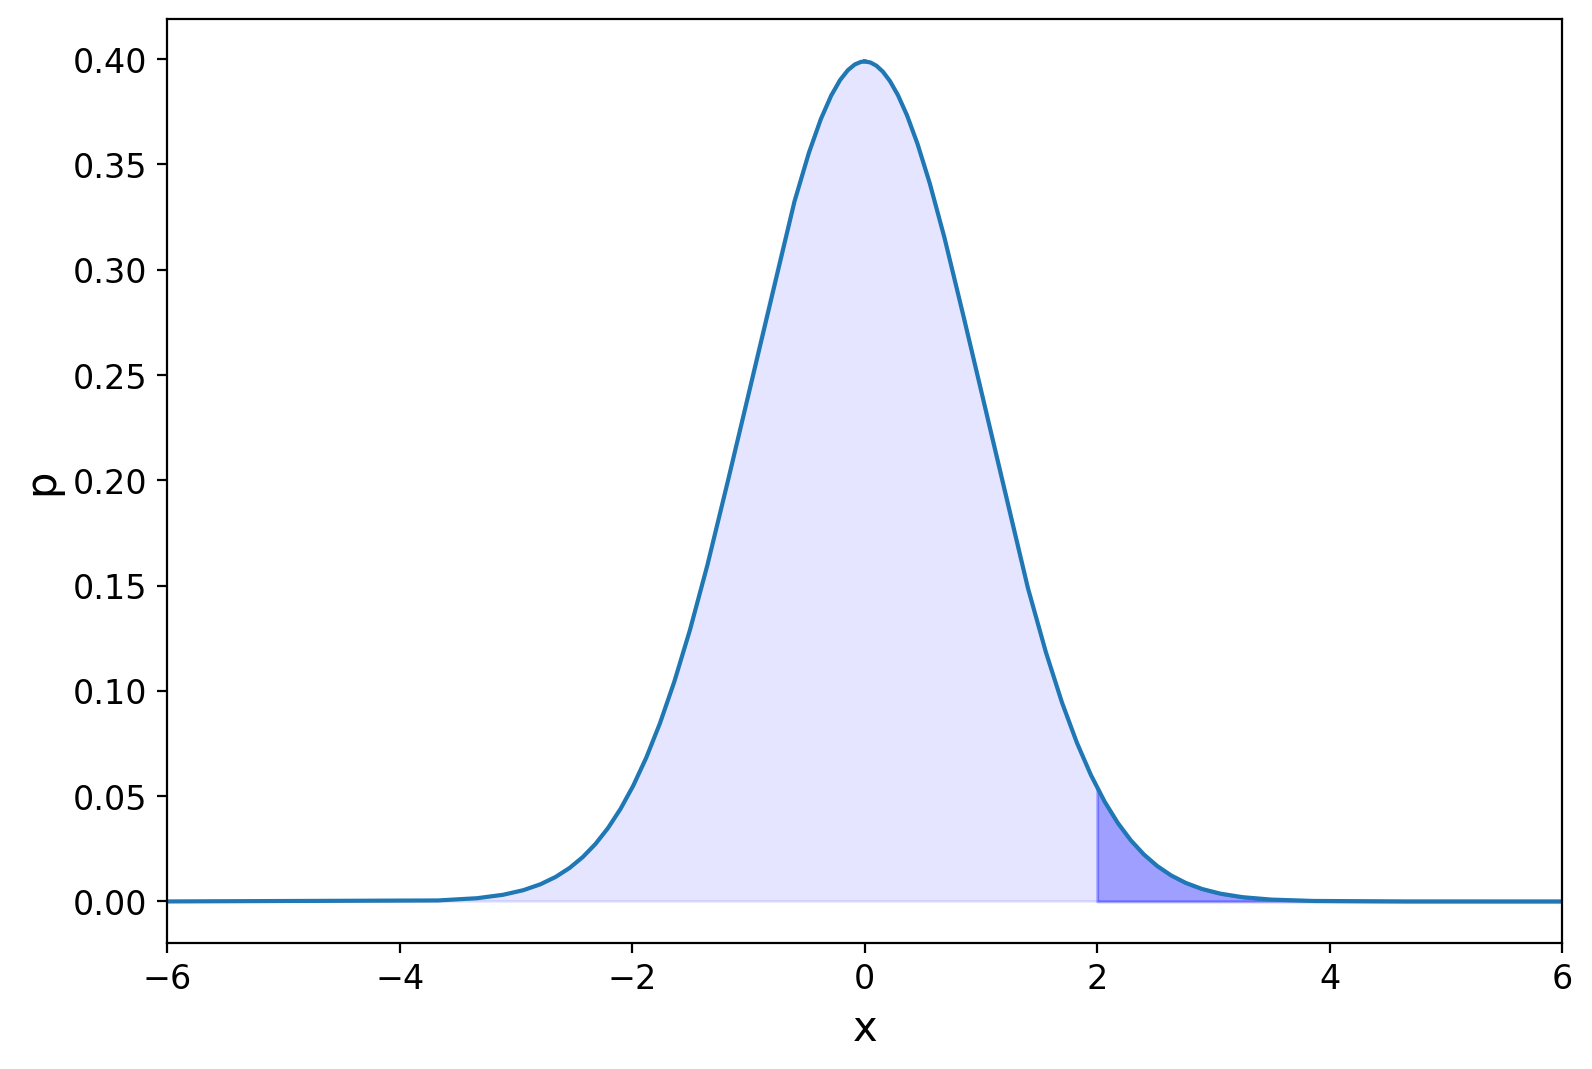

In [16]:
#>>>RUN: L10.3-runcell02

def gaus(mu=0,sigma=1,meas=2):
    x = np.arange(-10, 10, 0.001)
    xmeas = np.arange(meas, 10, 0.001)
    y = stats.norm.pdf(x,mu,sigma)
    ymeas = stats.norm.pdf(xmeas,mu,sigma)
    return x,y,xmeas,ymeas

def plotgaus():
    x,y,xmeas,ymeas=gaus(0,1,2)
    fig, ax = plt.subplots(figsize=(9,6))
    plt.style.use('fast')
    ax.plot(x,y)
    ax.fill_between(x,y,0, alpha=0.1, color='b')
    ax.fill_between(xmeas,ymeas,0, alpha=0.3, color='b')
    ax.set_xlim([-6,6])
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    plt.show()

plotgaus()

From the plot generated by the code above, it is clear that this particular measurement of $x=2$ has a large deviation from what we actually expected to observe and, therefore, has a very low probability. The key question that we would like to understand here is: *Is this deviation just a statistical fluctuation, or does this indicate that there is something wrong with our expectation, i.e. our assumed prior was wrong?*

**Understanding if this observation indicates that there is something wrong with what we expected is the focus of this lecture.**

Now, imagine that we perform this measurement a number of times, say 10 times, and all the results defy our expectations. What do you think about this? What if it happened 1000 times?

In the plots drawn by the code below, the *posterior* shows the distribution that was actually used to generate the sample data.

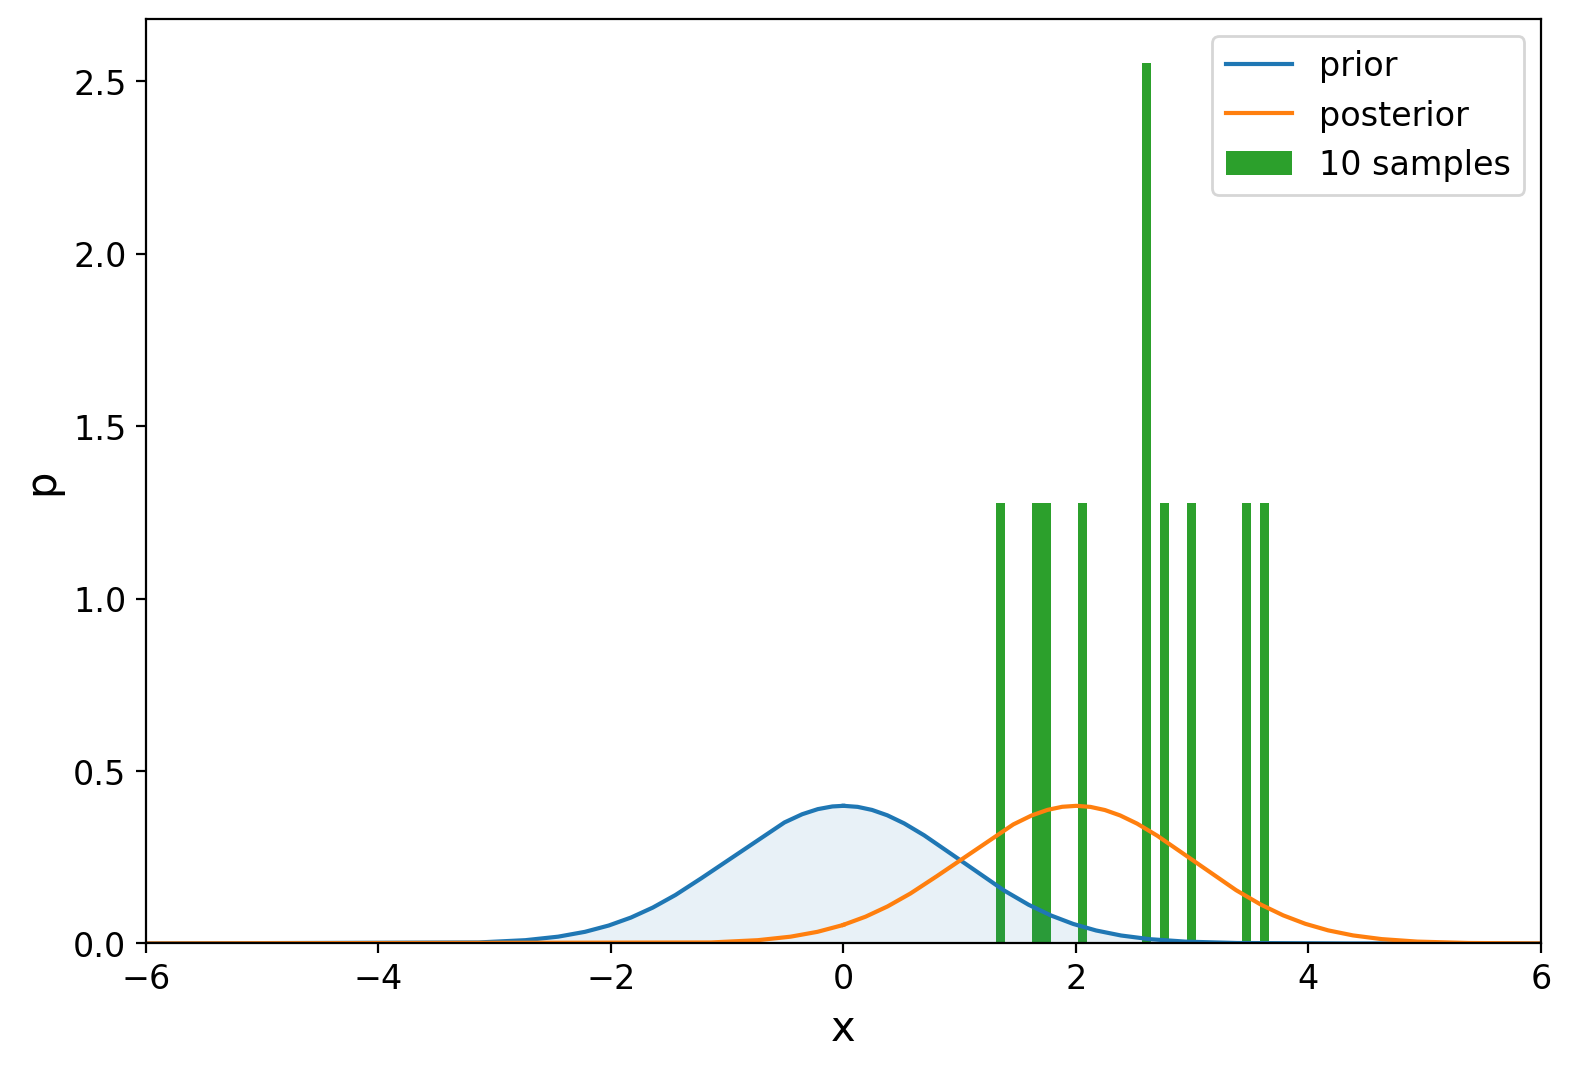

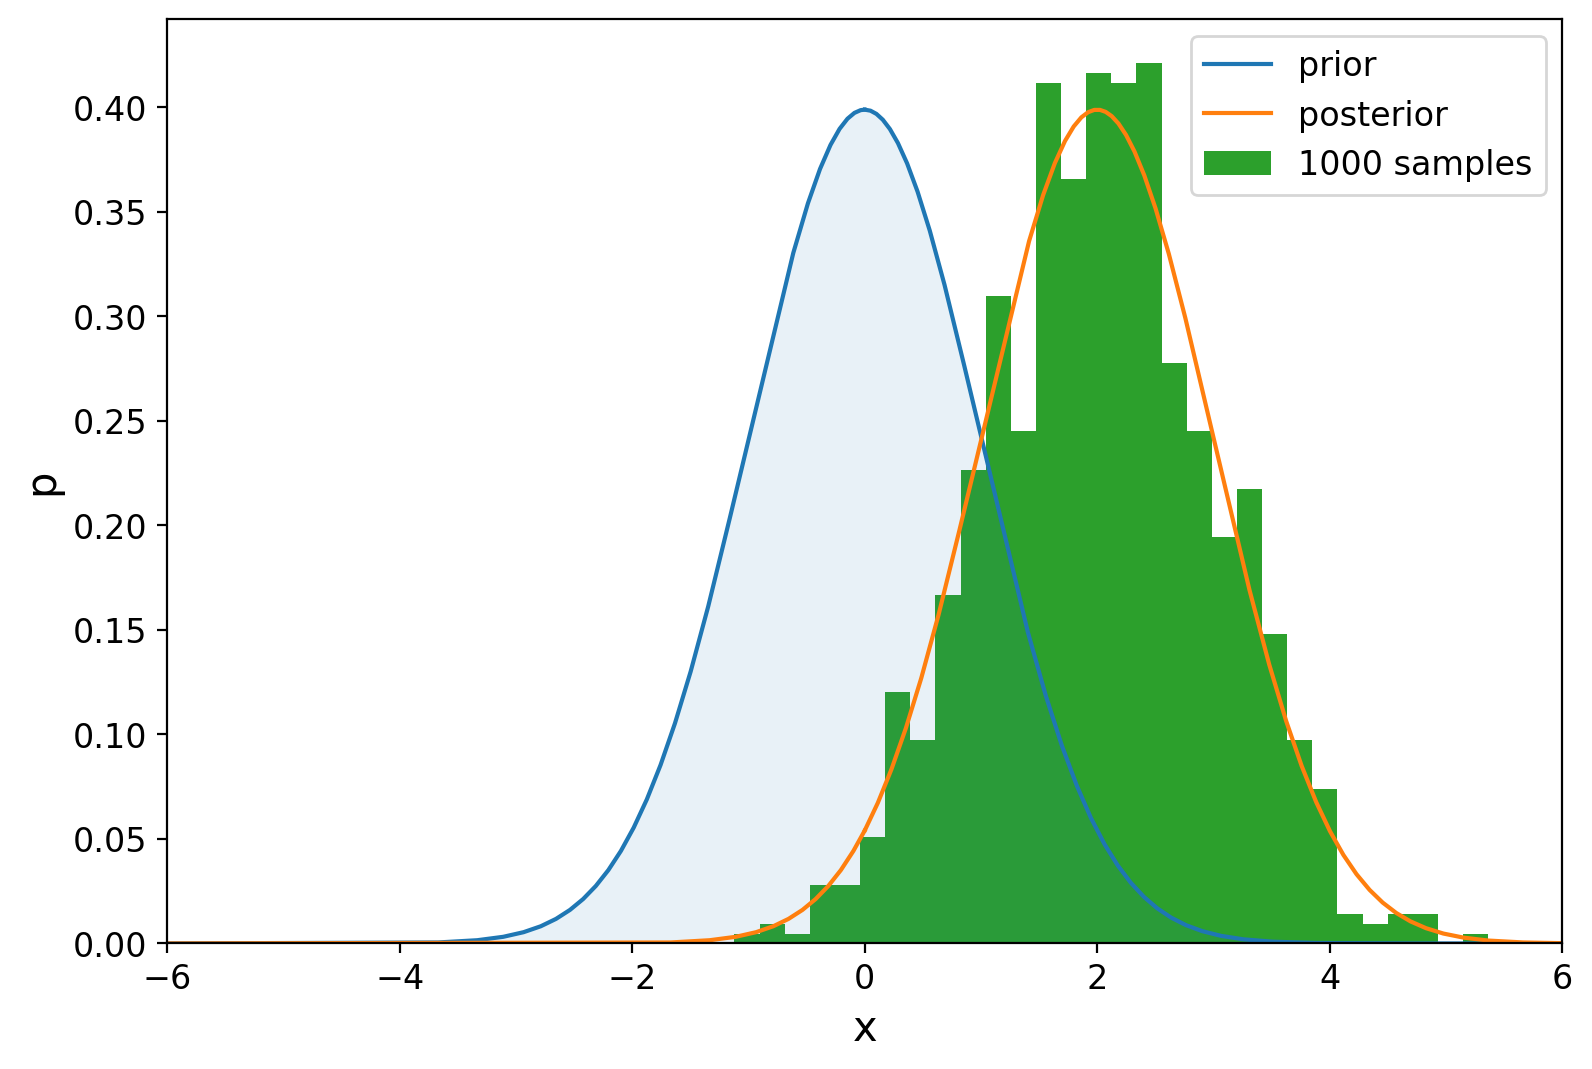

In [17]:
#>>>RUN: L10.3-runcell03

np.random.seed(32)

def gaus(mu=0,sigma=1):
    x = np.arange(-10, 10, 0.001)
    y = stats.norm.pdf(x,mu,sigma)
    return x,y

def plotGausSample(iZ,iSample):
    plt.style.use('fast')
    fig, ax = plt.subplots(figsize=(9,6))
    #sample
    samples = np.random.normal(iZ,1,iSample)
    x,y=gaus(iZ,1)
    #
    xs,ys=gaus(0,1)
    ax.plot(xs,ys,label='prior')
    ax.plot(x,y,label='posterior')
    count, bins, ignored = plt.hist(samples, 30, density=True, label=str(iSample)+' samples')
    ax.fill_between(xs,ys,0, alpha=0.1)
    ax.set_xlim([-6,6])
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    ax.legend()
    plt.show()

plotGausSample(2,10)
plotGausSample(2,1000)

So, looking at the distribution with only a few events, we can start to guess that our *prior* is wrong, although the shape of the actual distribution is not very clear.

If we look at the distribution with many events, we see that there is a glaringly obvious deviation between our prior and the actual measured distribution.  Furthermore, the shape of the correct probability distribution is much clearer. With both of these samples, we are getting the hint that something is wrong, and we need to fix our expectation for the probability distribution.

In this case, we can easily fix this by just moving our Gaussian to the right. In fact, we could just fit a Gaussian to the data to get the correct shape. That would resolve our issue.

However, we could take a more positive spin on our observed data, and say that our prior is actually right, and we are just getting a biased sample. In reality, there are many more events, and we just took a subset. This equates to thinking about your prior as being much larger, like in the figures below.

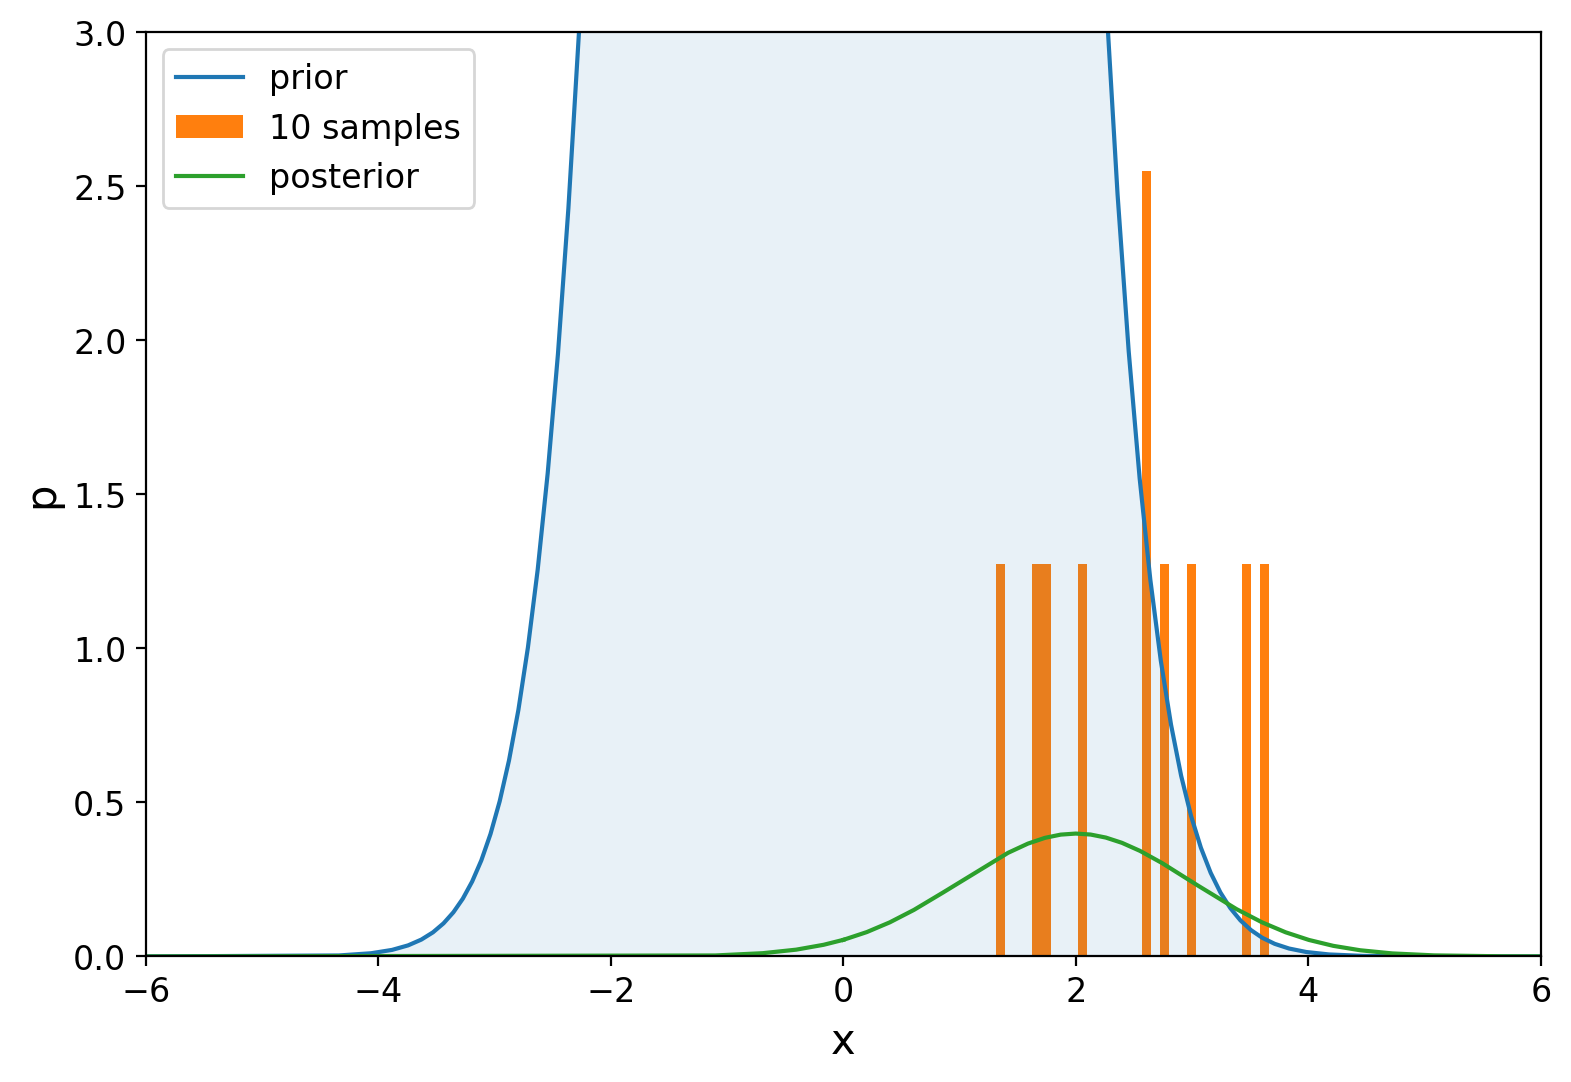

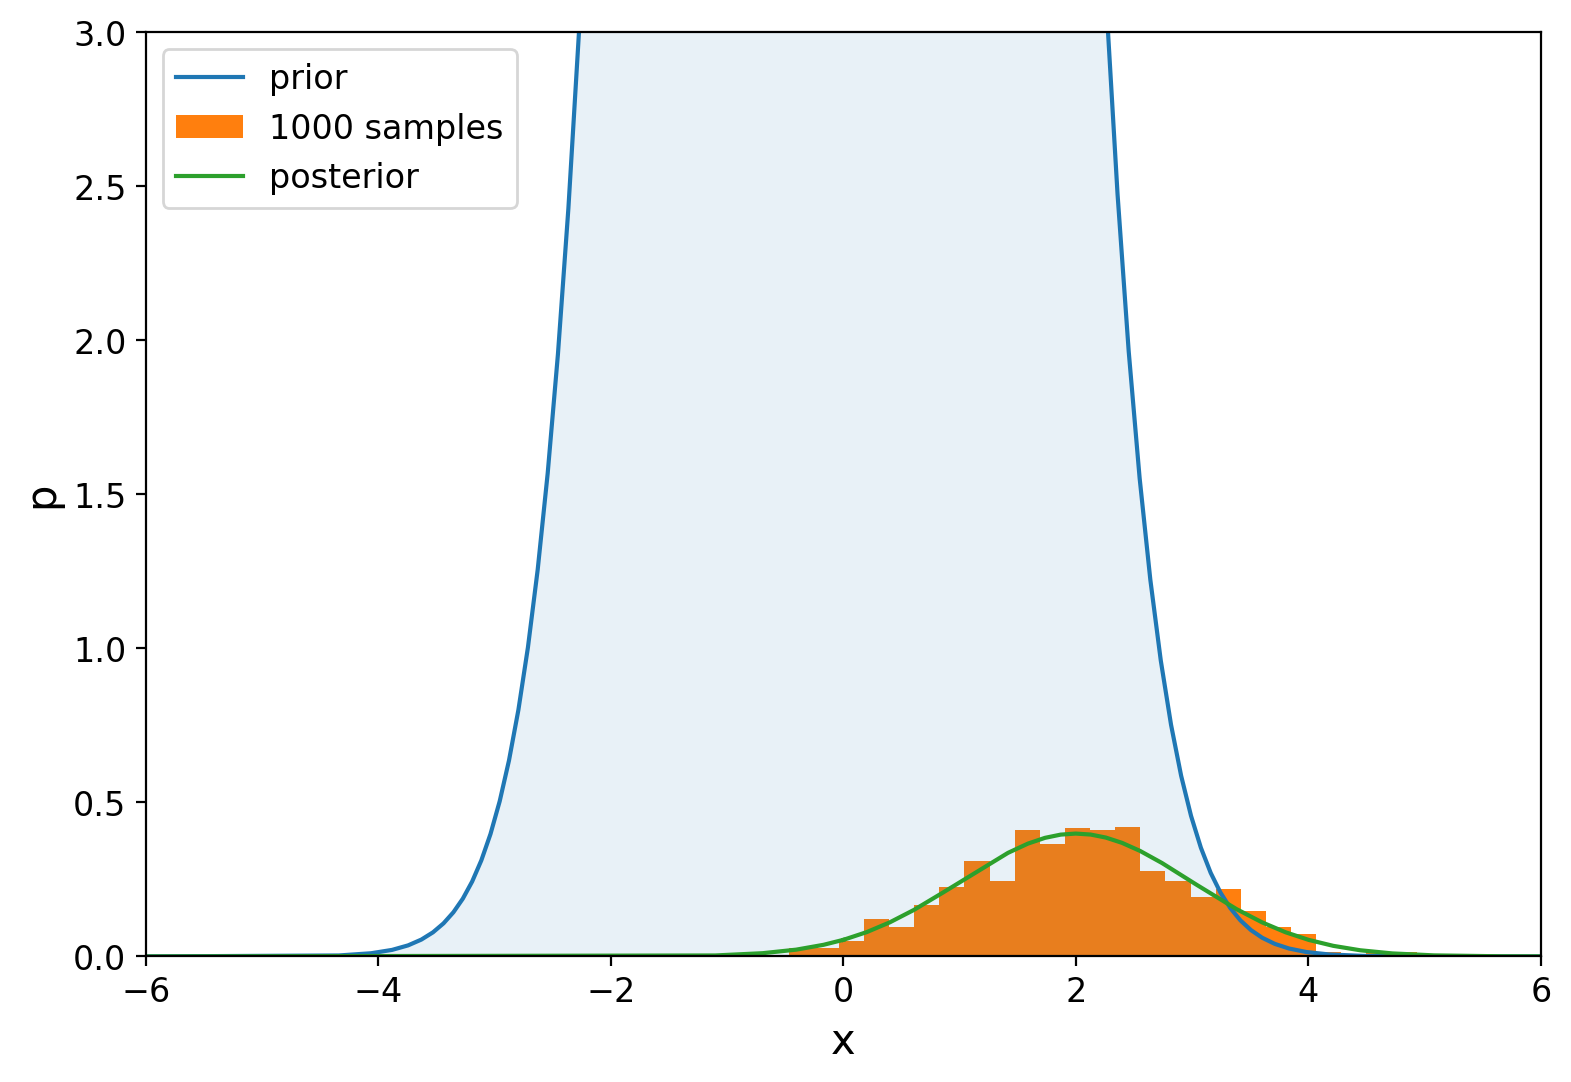

In [18]:
#>>>RUN: L10.3-runcell04

np.random.seed(32)

def plotGausSample(iZ,iSample):
    plt.style.use('fast')
    #sample
    samples = np.random.normal(iZ,1,iSample)
    x,y=gaus(iZ,1)
    #noral st
    xs,ys=gaus(0,1)
    ys*=100
    fig, ax = plt.subplots(figsize=(9,6))
    ax.plot(xs,ys,label='prior')
    count, bins, ignored = plt.hist(samples, 30, density=True, label=str(iSample)+' samples')
    ax.plot(x,y,label='posterior')
    ax.fill_between(xs,ys,0, alpha=0.1)
    ax.set_xlim([-6,6])
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    ax.legend(loc=2)
    #plt.ylim(0,0.43) #note: these bounds are used in video
    plt.ylim(0,3.0) #note: these bounds more clearly shows what we are investigating
    plt.show()

plotGausSample(2,10)

plotGausSample(2,1000)


<h3>Bayes Theorem</h3>

Now we have two results, we have a prior (aka a guess) of what we thought the data would look like, and a posterior for what we actually observe in the data. Bayes theorem connects these results.

To understand Bayes theorem, let's define a bunch of terms. First, we would like to define the probability of a hypothesis happening. We can write this probability as $P\left(\mathcal{H}\right)$, the probability of the hypothesis happening given a prior for how we expect the distribution to behave. To put a concrete label to this, let's consider that you are on a game show similar to the "Monty Hall" game show of the 1960s. You have 3 doors and there is a car behind one of the doors. The car is placed randomly; what is your $P\left(\mathcal{H}\right)$ before opening a door?


$$
\begin{eqnarray}
P(\mathcal{H}=\rm{door~1}) & = & \frac{1}{3} \\
P(\mathcal{H}=\rm{door~2}) & = & \frac{1}{3} \\
P(\mathcal{H}=\rm{door~3}) & = & \frac{1}{3}
\end{eqnarray}
$$

Everything changes when one of the doors is opened. There are two results. The first result is that there is a car behind the door, great! In the second case, you know that the door that was opened is empty.

Let's twist it up a bit. The door that you chose first is not opened right away. Instead, Monty opens one of the remaining two doors, being sure to open a door that does not have a car. He then asks you if you'd like to stay with your original choice, or switch to the other unopened door. What do you do?

Let's define $P\left(\mathcal{D}\right)$ as the probability of an instance of the data happening, and furthermore defining


$$
\begin{eqnarray}
 P\left(\mathcal{H} | \mathcal{D} \right) & = & \rm{probability~of~a~hypothesis~given~data} \\
 P\left(\mathcal{D} | \mathcal{H} \right) & = & \rm{probability~of~data~given~a~hypothesis} \\
\end{eqnarray}
$$

Let's say you choose door 1, and Monty opens door 2. We can write down the probability that Monty will open door 2


$$
\begin{eqnarray}
P(\rm{open~2}|\mathcal{H}=\rm{car~at~door~1}) & = & \frac{1}{2} \\
P(\rm{open~2}|\mathcal{H}=\rm{car~at~door~2}) & = & 0 \\
P(\rm{open~2}|\mathcal{H}=\rm{car~at~door~3}) & = & 1
\end{eqnarray}
$$

If you chose correctly the first time (car is, in fact, behind door 1), then Monty has a 50% chance of choosing door 2 or 3, since both doors do not contain a car. If you did not choose correctly the first time (car is, in fact, behind door 2 or 3), then Monty will for sure open a specific door, and in this scenario you know for sure that behind the other door that Monty did not choose is the car. So, given this perspective, do you switch or stay?

Let's write out the probabilities again. Remember, when you start you have a $\frac{1}{3}$ chance of choosing correctly, and a $\frac{2}{3}$ chance of choosing incorrectly.

$$
\begin{eqnarray}
P(\mathcal{H}=\rm{car~at~door~1}|\mathcal{D}=\rm{open~2}) & = & \frac{1}{3} \\
P(\mathcal{H}=\rm{car~at~door~2}|\mathcal{D}=\rm{open~2}) & = & 0 \\
P(\mathcal{H}=\rm{car~at~door~3}|\mathcal{D}=\rm{open~2}) & = & \frac{2}{3}  
\end{eqnarray}
$$

So, unintuitively, you should switch your guess! Let's look at this more precisely:


$$
\begin{equation}
P(\mathcal{H}=\rm{car~at~door~1}|\mathcal{D}=\rm{open~2}) = \frac{P(\mathcal{D}=\rm{open~2}|\mathcal{H}=\rm{car~at~door~1})P(\mathcal{H}=\rm{door~1})}{\rm{all~combinations}}
\end{equation}
$$

or in other words

$$
\begin{equation}
P(\mathcal{H}=\rm{car~at~door~1}|\mathcal{D}=\rm{open~2}) = \frac{P(\mathcal{D}=\rm{open~2}|\mathcal{H}=\rm{car~at~door~1})P(\mathcal{H}=\rm{door~1})}{P\left(\mathcal{D}=\rm{car~at~door~1}\right)+P\left(\mathcal{D}=\rm{car~at~door~2}\right)+P\left(\mathcal{D}=\rm{car~at~door~3}\right)}
\end{equation}
$$

More generically, we can write this as what is known as Bayes theorem

$$
\begin{equation}
 P\left(\mathcal{H} | \mathcal{D} \right) =  \frac{P\left(\mathcal{D} | \mathcal{H} \right)P(\mathcal{H})}{P(\mathcal{D})}
\end{equation}
$$

We can also relabel these terms as:

$$
\begin{eqnarray}
 P\left(\mathcal{H} | \mathcal{D} \right) & = & \rm{Posterior} \\
 P\left(\mathcal{D} | \mathcal{H} \right) & = & \rm{Likelihood} \\
 P\left(\mathcal{H} \right) & = & \rm{Prior} \\
 P\left(\mathcal{D} \right) & = & \rm{Normalizer(all~possibilities)}
\end{eqnarray}
$$

The Posterior is our observed result, the Prior is our initial guess, the likelihood is what we actually observe, and finally the bottom term, the normalizer, is to ensure that our probabilities integrate to $1$ (aka, we have covered, and only covered, all possibilities).  As a general rule of thumb, the way to remember this is

$$
\begin{equation}
 \rm{posterior} \propto \rm{likelihood} \times \rm{prior}
\end{equation}
$$

<a name='exercises_10_3'></a>     

| [Top](#section_10_0) | [Restart Section](#section_10_3) | [Next Section](#section_10_4) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-10.3.1</span>

If you roll a normal die and observe the outcome 6 three times in a row, are you surprised? What is the prior in this case? Enter the value for your prior as a fraction with precision 1e-4.

Hint: You could use `stats.binom.pmf` to compute this value.

In [19]:
#>>>EXERCISE: L10.3.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

stats.binom.pmf(3,3,1/6)

0.0046296296296296285

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-10.3.2</span>

Let's say your prior is a Gaussian with mean 0 and width 1, but your true, posterior distribution is a Gaussian with mean 0.5 and width 1. Generate 1000 events using this posterior distribution and find the most extreme, positive value (farthest from 0). What is the p-value of this extreme value (i.e., the probability of observing this extreme value or higher), given your prior? Enter your answer as a number with precision 1e-6.

Given that you have 1000 samples from this posterior distribution, how does this probability compare with what you would expect? In other words, is it likely to have occured once in 1000 samples?

In [20]:
#>>>EXERCISE: L10.3.2
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

#use this random seed when calculating/reporting your answers
np.random.seed(101)

#1000 random samples from posterior distribution
sample= np.random.normal(0.5, 1, 1000)

#most extreme value from samples (take the largest absolute value)
exvalue= np.max(np.abs(sample))

#the probability of attaining that extreme value (or greater), given your prior
pvalue= 1-stats.norm.cdf(exvalue)

#print results
print("extreme value",exvalue,"pvalue",pvalue)

extreme value 3.5374465339285237 pvalue 0.0002020079878150005


<a name='section_10_4'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L10.4 Bayesian vs. Frequentist and Likelihood</h2>  

| [Top](#section_10_0) | [Previous Section](#section_10_3) | [Exercises](#exercises_10_4) | [Next Section](#section_10_5) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.2x+1T2025/block-v1:MITxT+8.S50.2x+1T2025+type@sequential+block@seq_LS10/block-v1:MITxT+8.S50.2x+1T2025+type@vertical+block@vert_LS10_vid4" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Slides</h3>

Run the code below to view the slides for this section, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L10/slides_L10_04.html" target="_blank">HERE</a>.

In [21]:
#>>>RUN: L10.4-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L10/slides_L10_04.html', width=970, height=550)

<h3>Overview</h3>

Now, let's start to think about how we wish to quote our results. If our priors are incorrect, and we continue to progressively take data, at some point our priors are going to be wrong. Dealing with how this is wrong depends on what sort of statistician you are.

**Frequentist**: **The data guides our model.** If I see a data distribution, I can come up with a way to fit it. By getting a good fit, I can explain the next result.  We can use what we observe in the data to explain how we will observe these phenomena in the future.

**Bayesian**: It is possible to create a model of everything, and within your model you can explain all random phenomena. As we take more data, we can fine tune our model to be ever more predictive.

<h3>Bayesian View</h3>

Given Bayes theorem, let's go back to our original measurement. In that case, we had two normal distributions, a posterior about two, and a prior about zero. How do we connect these two?

$$
\begin{equation}
 P\left(\mathcal{H} | \mathcal{D} \right) =  \frac{P\left(\mathcal{D} | \mathcal{H} \right)P(\mathcal{H})}{P(\mathcal{D})} \\
\mathcal{N}(x,\mu=2,1) = \frac{P\left(\mathcal{D} | \mathcal{H} \right)}{P(\mathcal{D})}\mathcal{N}(x,\mu=0,1) \\
P\left(\mathcal{D} | \mathcal{H} \right) = \frac{\mathcal{N}(x,\mu=2,1)}{\mathcal{N}(x,\mu=0,1)} P(\mathcal{D})
\end{equation}
$$

Since $P(\mathcal{D})$ is just a constant to ensure that our resulting probability is normalized, we can pretty easily compute the likelihood ratio in our first example.

**Note:** In the remainder of this section, the terms "likelihood" and "likelihood ratio" are used to refer to the ratio of the probability of the data or posterior divided by the probability of the prior, both evaluated at a specific point. This ratio gets very large at any point where data appears (or, equivalently, the probability of the posterior is not small) but the prior predicts a very low probability of that happening. So, with this definition a large *likelihood* indicates the presence of very *unlikely* data if the prior is correct. You will see graphs labeled "Likelihood" which shoot up to extremely large values when the posterior exceeds the prior by a large factor.

Section 10.5 will discuss fitting and then we will return to the more common definition of the likelihood as the probability of an entire dataset for a given prior in Section 10.6.

For now, we continue with this definition of "Likelihood", and begin by plotting the ratio described above using a posterior Gaussian with a mean of 2 and a prior Gaussian with a mean of 0, both with widths of 1.


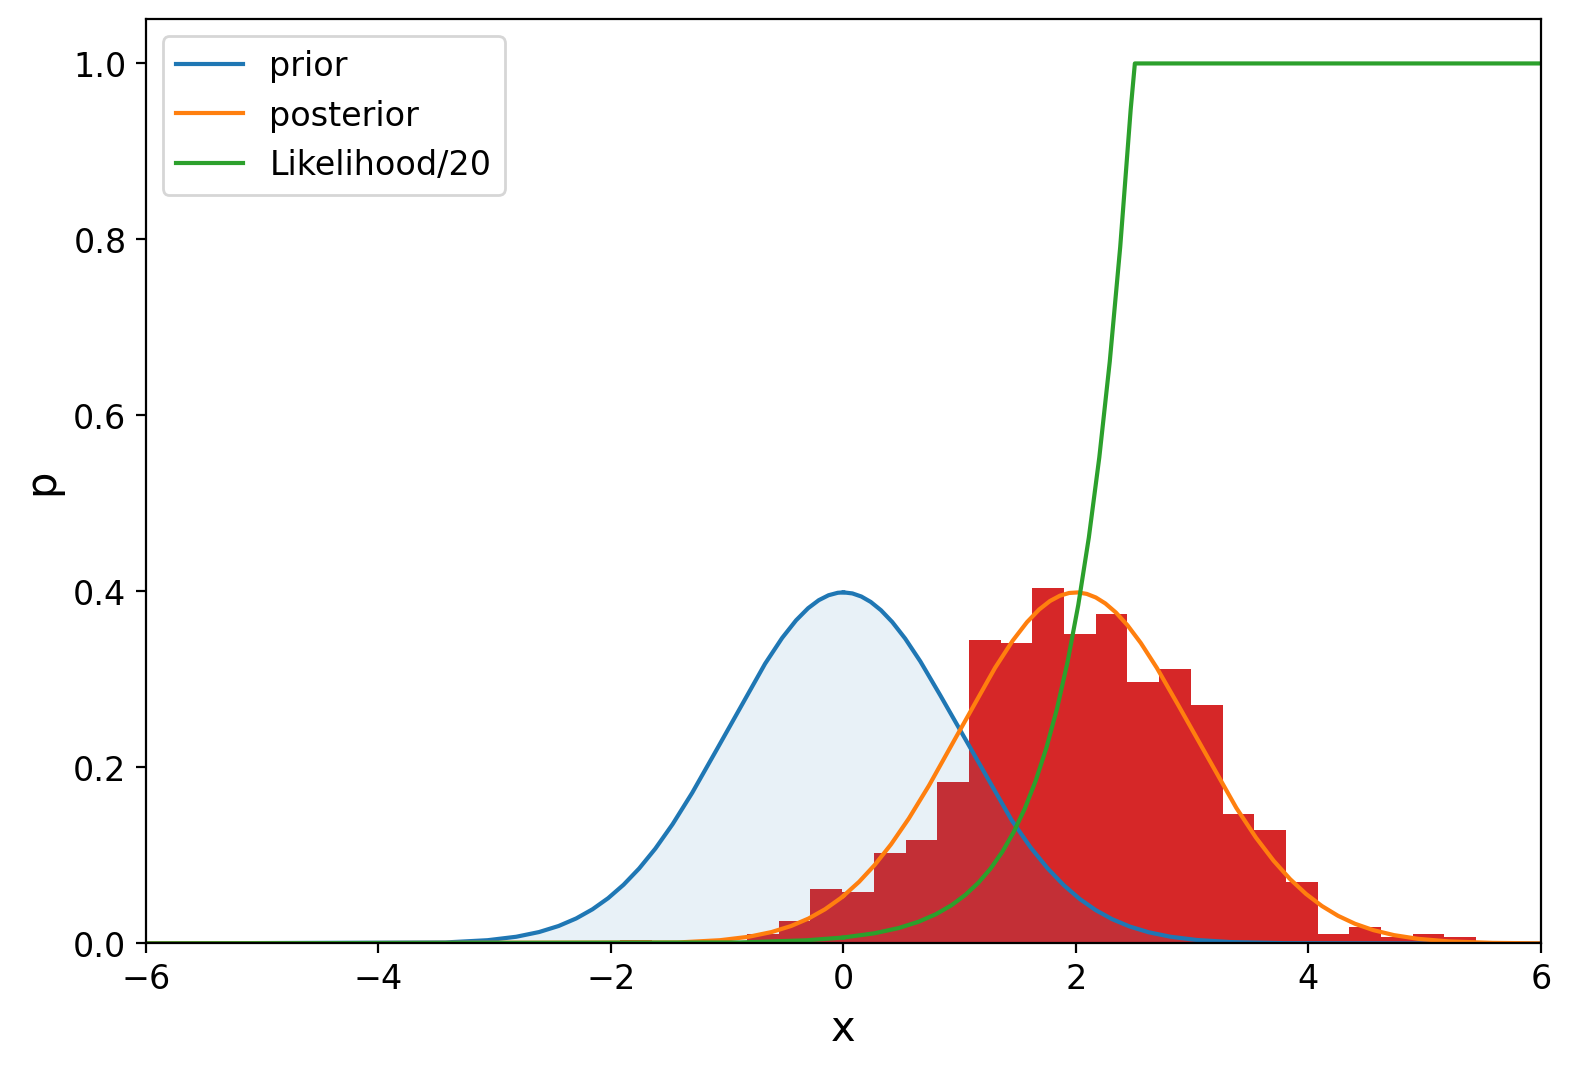

In [22]:
#>>>RUN: L10.4-runcell01

#Our measurement probability
def gaus(mu=0,sigma=1):
    x = np.arange(-10, 10, 0.001)
    y = stats.norm.pdf(x,mu,sigma)
    return x,y

def plotGausSampleLike(iZ,iSample):
    plt.style.use('fast')
    fig, ax = plt.subplots(figsize=(9,6))
    #Sample
    samples = np.random.normal(iZ,1,iSample)
    x,y=gaus(iZ,1)
    #prior
    xs,ys=gaus(0,1)
    #likelihood
    yratio=np.minimum(y/(ys*20.),1.)
    #plot
    ax.plot(xs,ys,label='prior')
    ax.plot(x,y,label='posterior')
    ax.plot(x,yratio,label='Likelihood/20')
    count, bins, ignored = plt.hist(samples, 30, density=True)
    ax.fill_between(xs,ys,0, alpha=0.1)
    ax.set_xlim([-6,6])
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    ax.legend()
    plt.show()

plotGausSampleLike(2,1000)

As you can see, the likelihood shoots up, and in fact shoots up above 1 (note that what is plotted in likelihood/20). This means that our likelihood is unphysical, and we are not capturing our physics, or more importantly, this means that **our prior is wrong**. What's the right prior in this scenario?

Let's tweak our prior to have a large sigma $\mathcal{N}(\mu=0,\sigma=2)$.

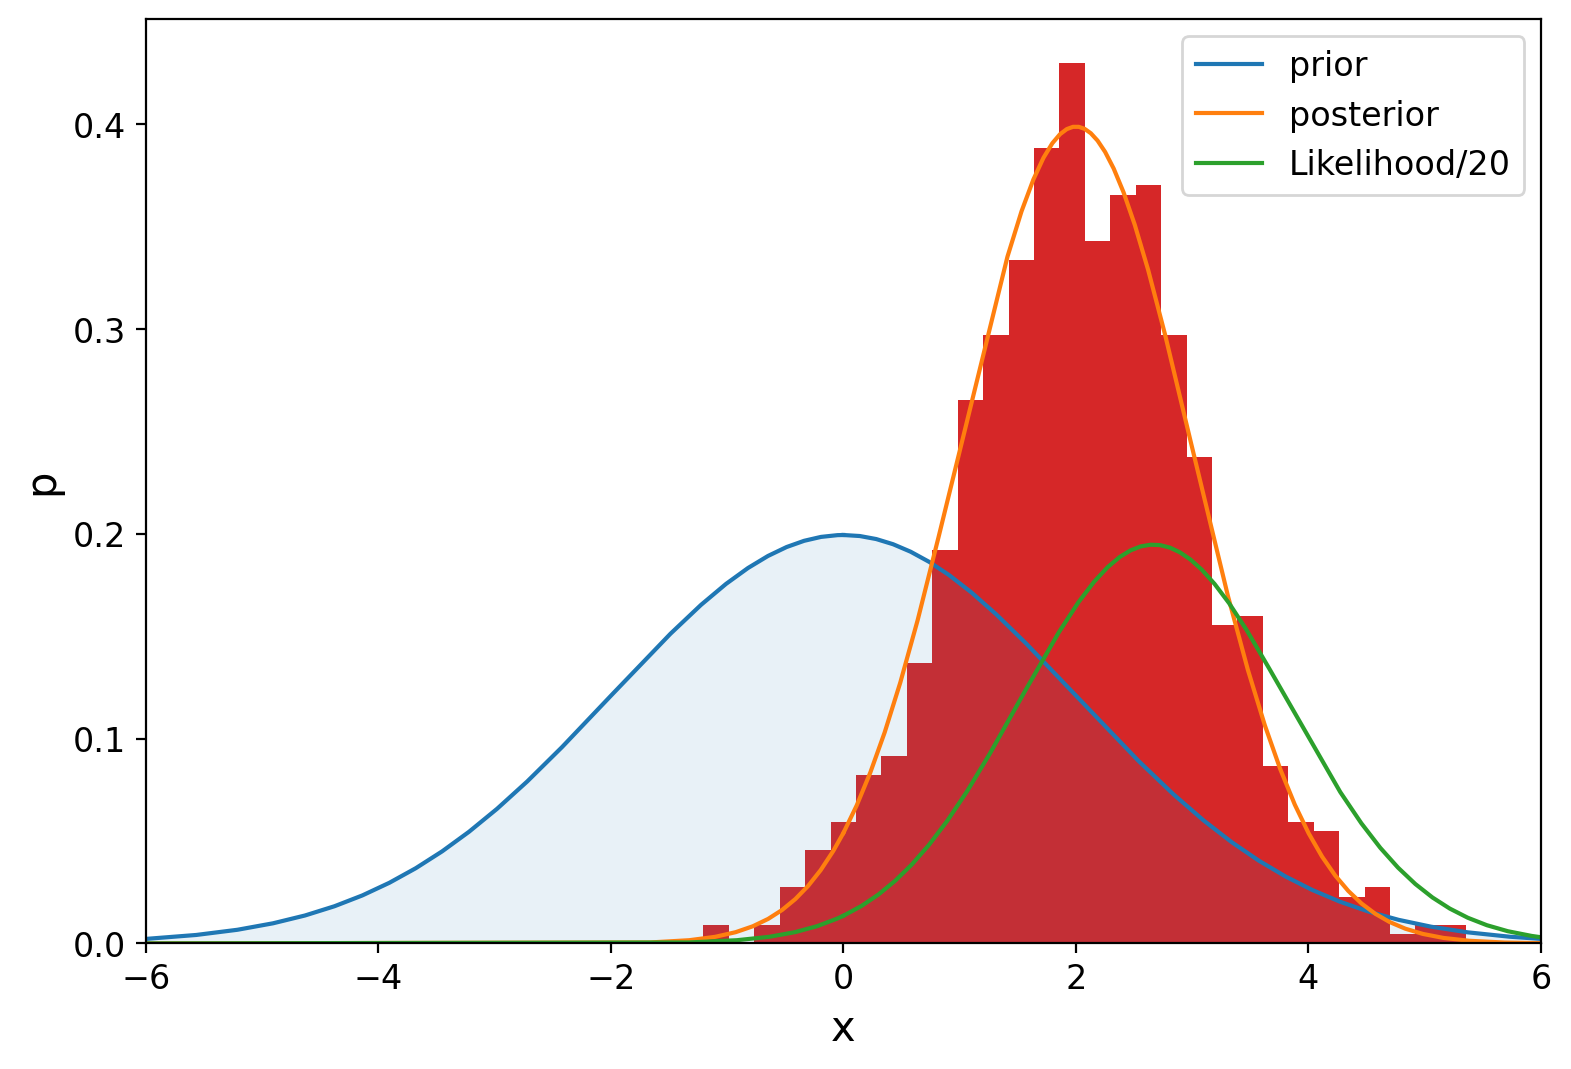

In [23]:
#>>>RUN: L10.4-runcell02

def plotGausSampleLikeNew(iZ,iSample,iSigMax):
    plt.style.use('fast')
    fig, ax = plt.subplots(figsize=(9,6))
    #ample our posterior
    samples = np.random.normal(iZ,1,iSample)
    x,y=gaus(iZ,1)
    #Sample our prior
    xs,ys=gaus(0,iSigMax) #######<<<<< This is our tweak
    #now compute the likelihood
    yratio=np.minimum(0.05*y/ys,20.)
    #plot this stuff
    ax.plot(xs,ys,label='prior')
    ax.plot(x,y,label='posterior')
    ax.plot(x,yratio,label='Likelihood/20')
    count, bins, ignored = plt.hist(samples, 30, density=True)
    ax.fill_between(xs,ys,0, alpha=0.1)
    ax.set_xlim([-6,6])
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    ax.legend()
    plt.show()
    #now return our sampled normal distribution
    return samples

samples=plotGausSampleLikeNew(2,1000,2)

What have we done?  Essentially, we had previously claimed that our measurement was at zero with uncertainty (expected $\sigma$=1). Now, what we have done is made the claim that our uncertainty (the width of our prior) is much larger. This new, larger uncertainty lowered our likelihood to some number that is now not insanely large.

<a name='exercises_10_4'></a>     

| [Top](#section_10_0) | [Restart Section](#section_10_4) | [Next Section](#section_10_5) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-10.4.1</span>

The choice of prior can really change your outlook on fittings. Here you will compare the likelihood using two different priors.

First, plot the maximum likelihood from -5 to 5, using a posterior Gaussian distribution centered at 0.5 and a prior Gaussian distribution centered at 0. Next, use a prior that is a flat distribution, and compare the new likelihood ratio to your previous result. Which prior would be better to use, and why? Choose the best answer from the following:

A) Using a Gaussian prior yields a likelihood ratio that is also Gaussian.\
B) Using a Gaussian prior yields a likelihood ratio that is easier to interpret.\
C) Using a flat prior ensures that the likelihood ratio is a contant value.\
D) Using a flat prior ensures that the likelihood ratio does not skyrocket.

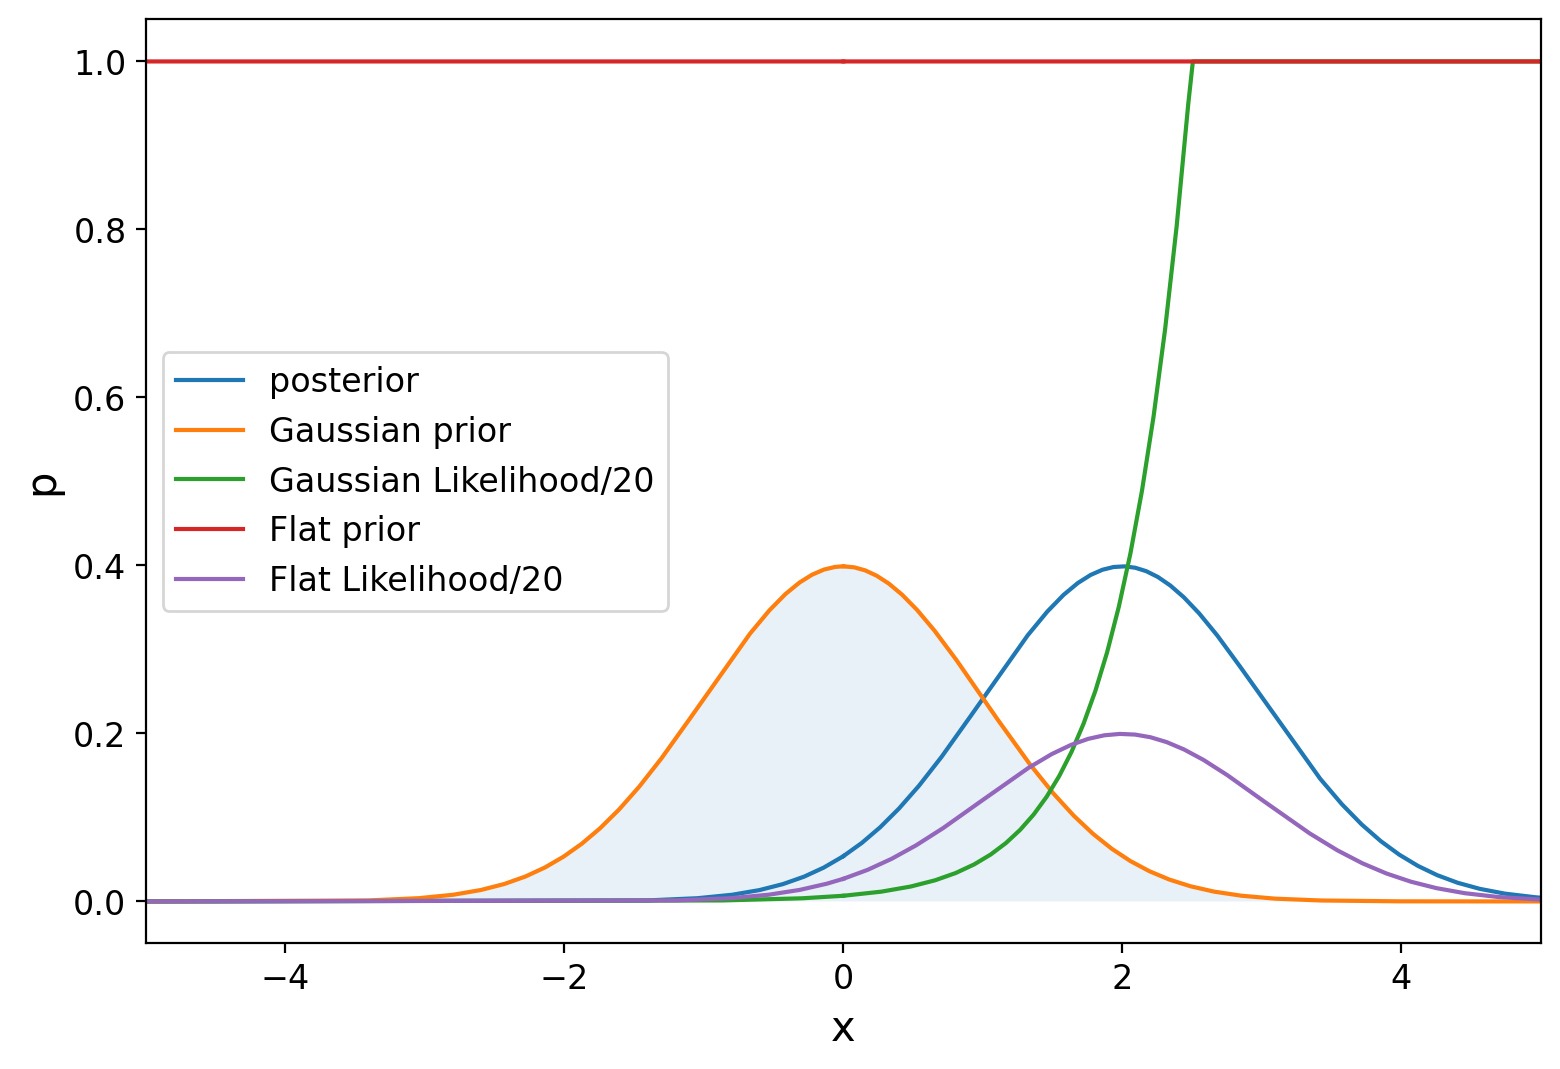

In [31]:
#>>>EXERCISE: L10.4.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def flat(iX):
    return np.where(iX < 5, np.where(iX < -5, 0, 0.1 ), 0)

def plotGausSampleLikeNew2(iPost,iPrior):
    plt.style.use('fast')
    fig, ax = plt.subplots(figsize=(9,6))

    #Base Posterior a function
    x,y=gaus(iPost,1)

    #Gaussian prior
    xs,ys = gaus(iPrior,1)

    #Flat Prior
    yflat = np.ones(len(x))

    #now compute the likelihood ratio
    #use 20. as a maximum value
    ygaussratio = np.minimum(y/ys, 20.)
    yflatratio = np.minimum(y/yflat, 20.)

    #plot this stuff
    ax.plot(x,y,label='posterior')

    #plot Gaussian prior and likelihood
    ax.plot(xs,ys,label='Gaussian prior')
    ax.fill_between(xs,ys,0, alpha=0.1)
    ax.plot(x,ygaussratio/20.,label='Gaussian Likelihood/20')

    #plot flat prior and likelihood
    ax.plot(x,yflat,label='Flat prior')
    ax.plot(x,yflatratio/2.,label='Flat Likelihood/20')

    ax.set_xlim([-5,5])
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    ax.legend()
    plt.show()
    #now return our sampled normal distribution
    return samples

samples=plotGausSampleLikeNew2(2,0)


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-10.4.2</span>

Now let's calculate the likelihood ratio for the maximum value obtained from simulated data, where the data are randomly drawn from a Gaussian distribution with mean=0.25 and sigma=1. We will use a Gaussian prior with mean=0 and sigma=1.

First, complete the code, which should do the following: the `maxlikelihood` function should calculate the likelihood ratio between two Gaussian distributions (posterior/prior), evaluated at the value `val`, where `val` is the maximum value obtained from the randomly sampled array`isamples`. In the function `maxlike`, the array `samples` is drawn from a Gaussian distribution with mean=0.25 and sigma=1, and `plotGausSampleLikeNew` is used to obtain the data and make the plots.

After completing the code, compare the output of `maxlike` using 1e2 samples and 1e6 samples. What is the maximum likelihood value in each case? Would you expect it to increase or decrease with more samples? What does this mean about the distributions (do we have the right prior)?

Report your answer as a list of two numbers with precition 1e-2: `[max likelihood 1e2 samples, max likelihood 1e6 samples]`



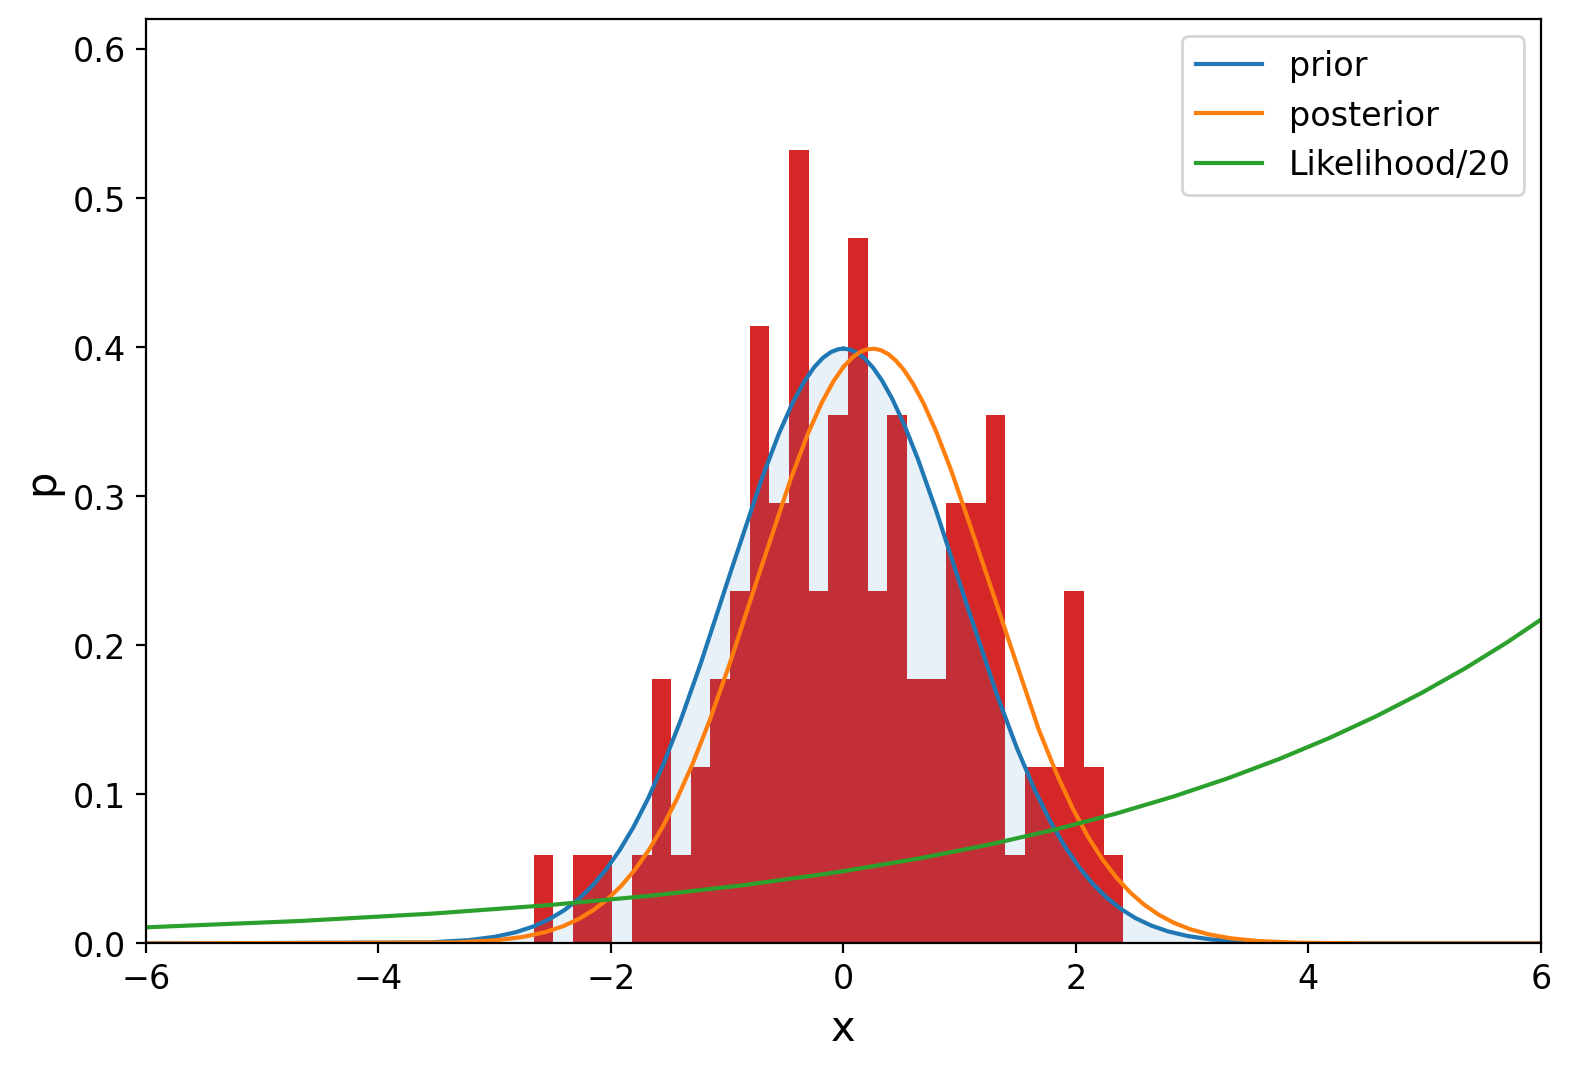

Max likelihood: 100  is  1.7696598190977462


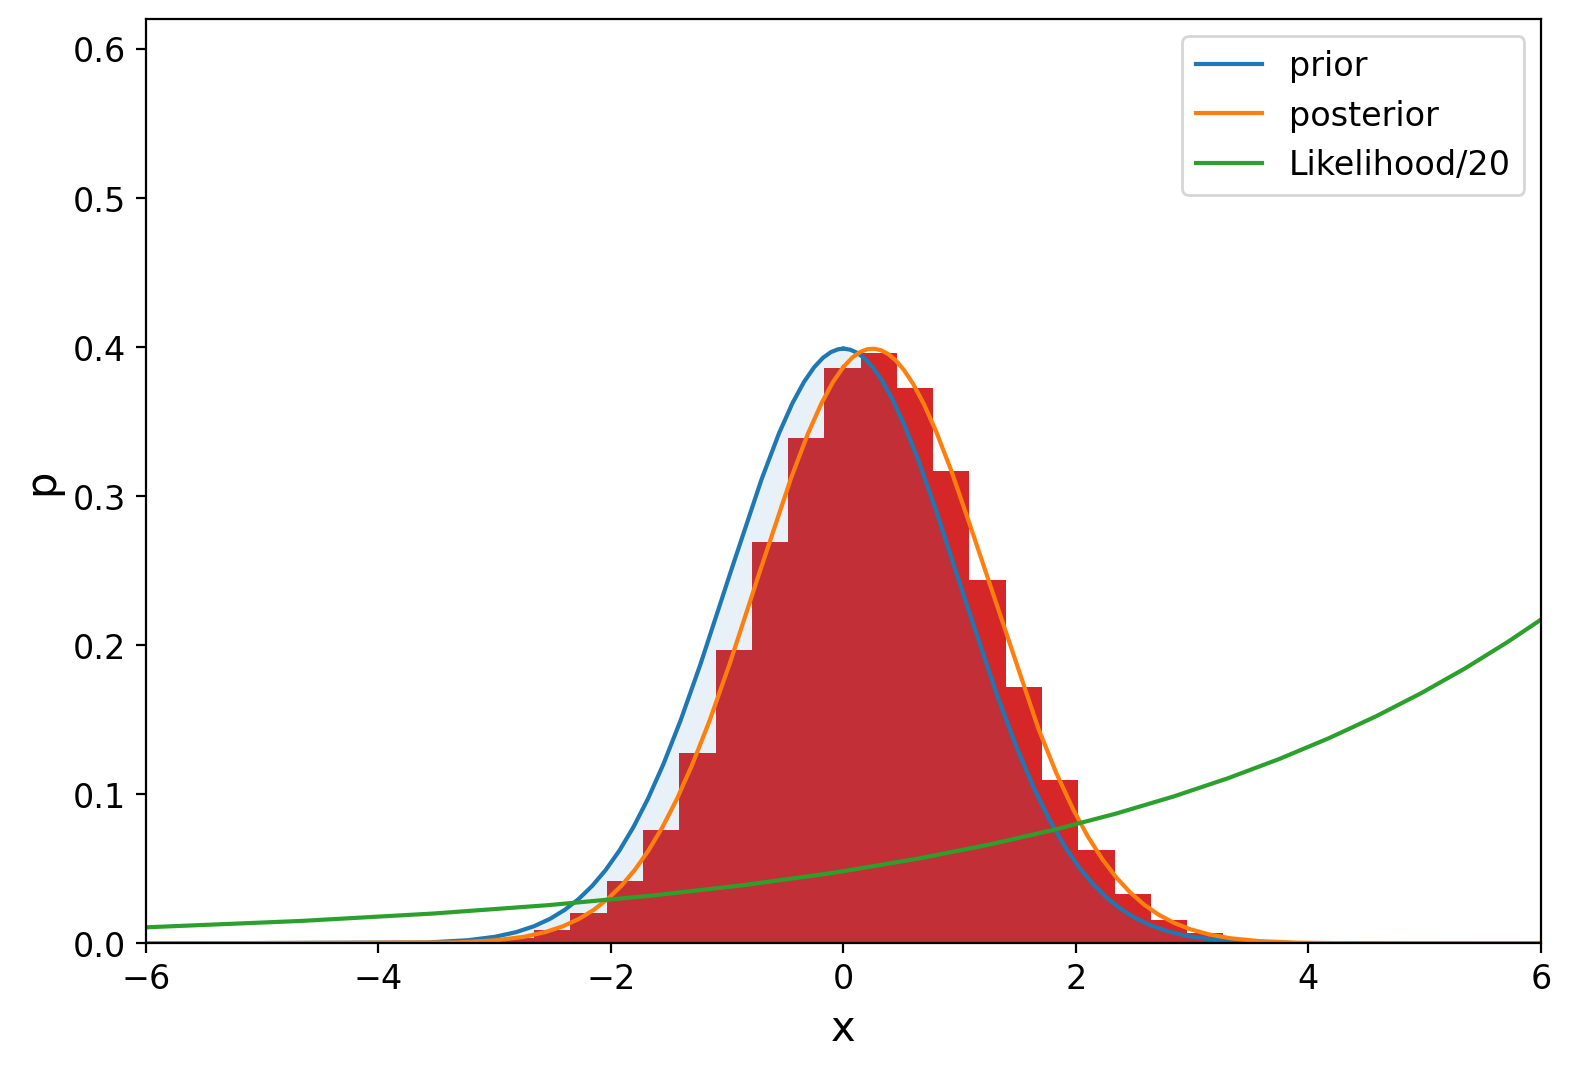

Max likelihood: 1000000  is  3.2415672130518676


In [35]:
#>>>EXERCISE: L10.4.2
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

np.random.seed(3)

def maxlikelihood(isamples,mu1=0.25,sig1=1,mu2=0,sig2=1):
    val=np.max(isamples)#compute the highest sampled gaussian
    gaus2 = stats.norm.pdf(val,mu2,sig2)
    gaus1 = stats.norm.pdf(val,mu1,sig1)
    like=gaus1/gaus2
    return like

def maxlike(iN):
    samples=plotGausSampleLikeNew(0.25,iN,1)
    like=maxlikelihood(samples)
    print("Max likelihood:",iN," is ",like)

maxlike(100)
maxlike(1000000)

<a name='section_10_5'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L10.5 Bayesian vs. Frequentist Fitting Example</h2>  

| [Top](#section_10_0) | [Previous Section](#section_10_4) | [Exercises](#exercises_10_5) | [Next Section](#section_10_6) |


<h3>Overview</h3>

Note: There is no video associated with this content.

To try to capture these ideas, let's try fitting a Gaussian with two separate approaches: Bayesian vs. Frequentist. To get the data, we will randomly sample a Gaussian distribution with mean 0 and standard deviation 1.

**Note: You may refer to the first module of this course series, 8.S50.1x, for more details on fitting. In particular, we are using lmfit, which is introduced in Lesson 4 of the course.**


<h3>Frequentist Approach</h3>

First, we use the Frequentist approach, in which we fit the data with a Gaussian with all of its parameters allowed to vary. Let's suggest to the fit model that the center should be at 2, but all it to freely fit this parameter.

<ipython-input-36-4a1e9d1f3216>:15: RuntimeWarning: divide by zero encountered in divide
  weight=1./np.sqrt(count)


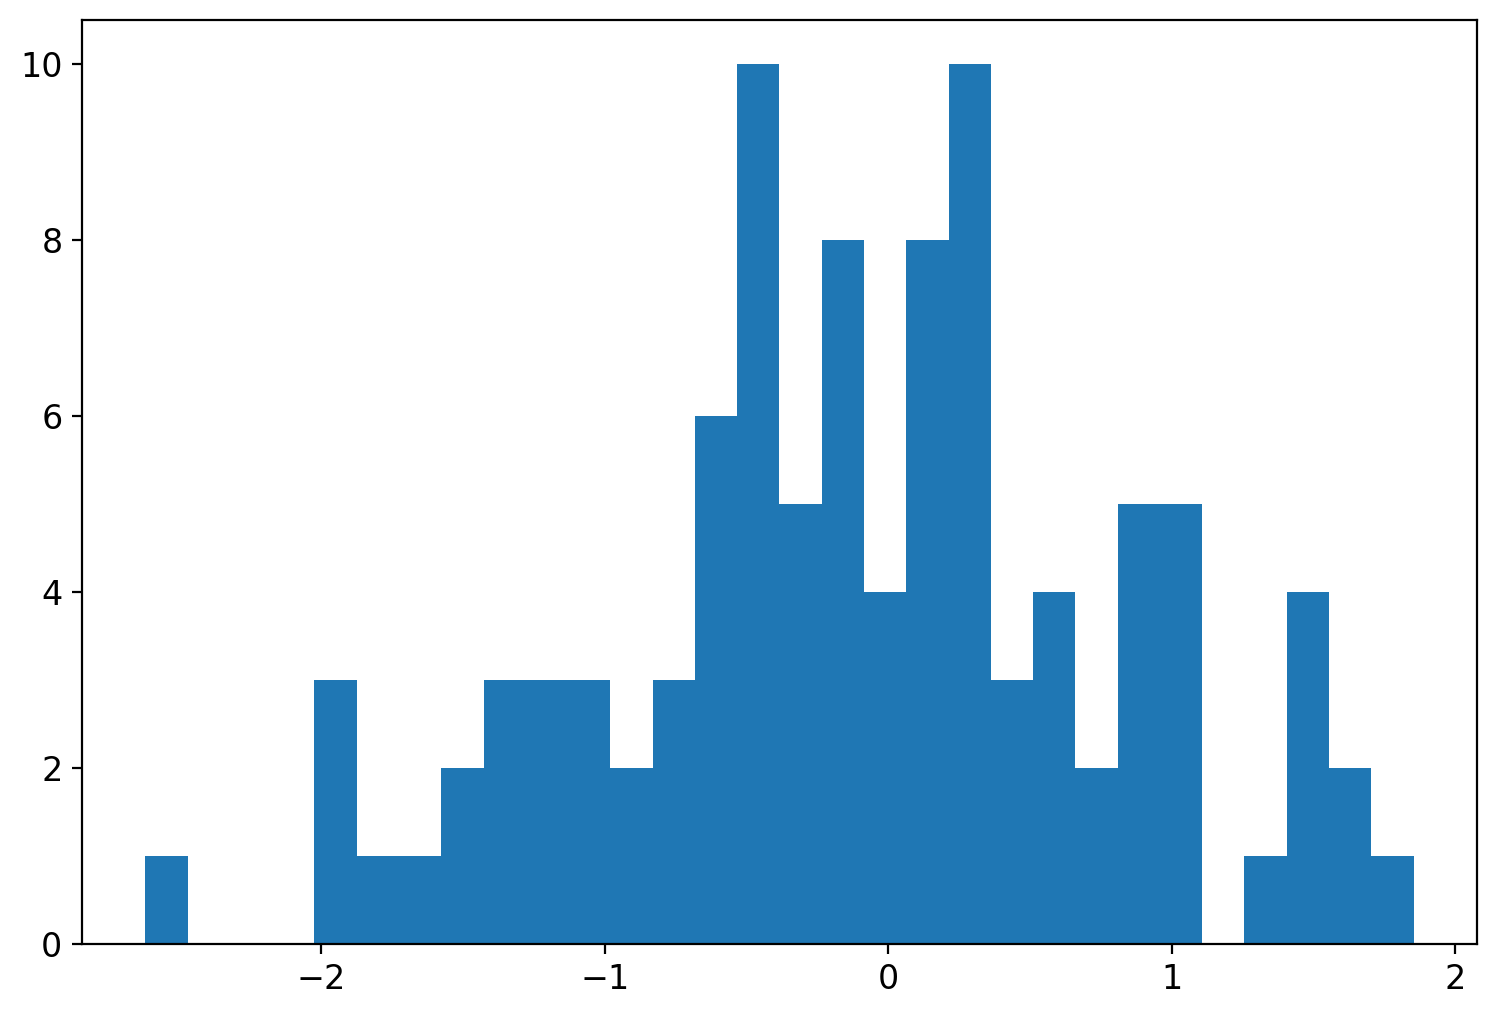

/usr/local/lib/python3.11/dist-packages/lmfit/model.py:2201: RuntimeWarning: divide by zero encountered in divide
  yerr = 1.0/self.weights
/usr/local/lib/python3.11/dist-packages/lmfit/model.py:2320: RuntimeWarning: divide by zero encountered in divide
  yerr = 1.0/self.weights


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 93
    # data points      = 30
    # variables        = 3
    chi-square         = 19.0213671
    reduced chi-square = 0.70449508
    Akaike info crit   = -7.66903344
    Bayesian info crit = -3.46544130
    R-squared          = 0.51921299
[[Variables]]
    amplitude:  13.0889305 +/- 1.28442939 (9.81%) (init = 1)
    center:    -0.06675193 +/- 0.10942446 (163.93%) (init = 2)
    sigma:      1.00318298 +/- 0.11412908 (11.38%) (init = 1)
    fwhm:       2.36231535 +/- 0.26875345 (11.38%) == '2.3548200*sigma'
    height:     5.20516012 +/- 0.65308154 (12.55%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = +0.3059


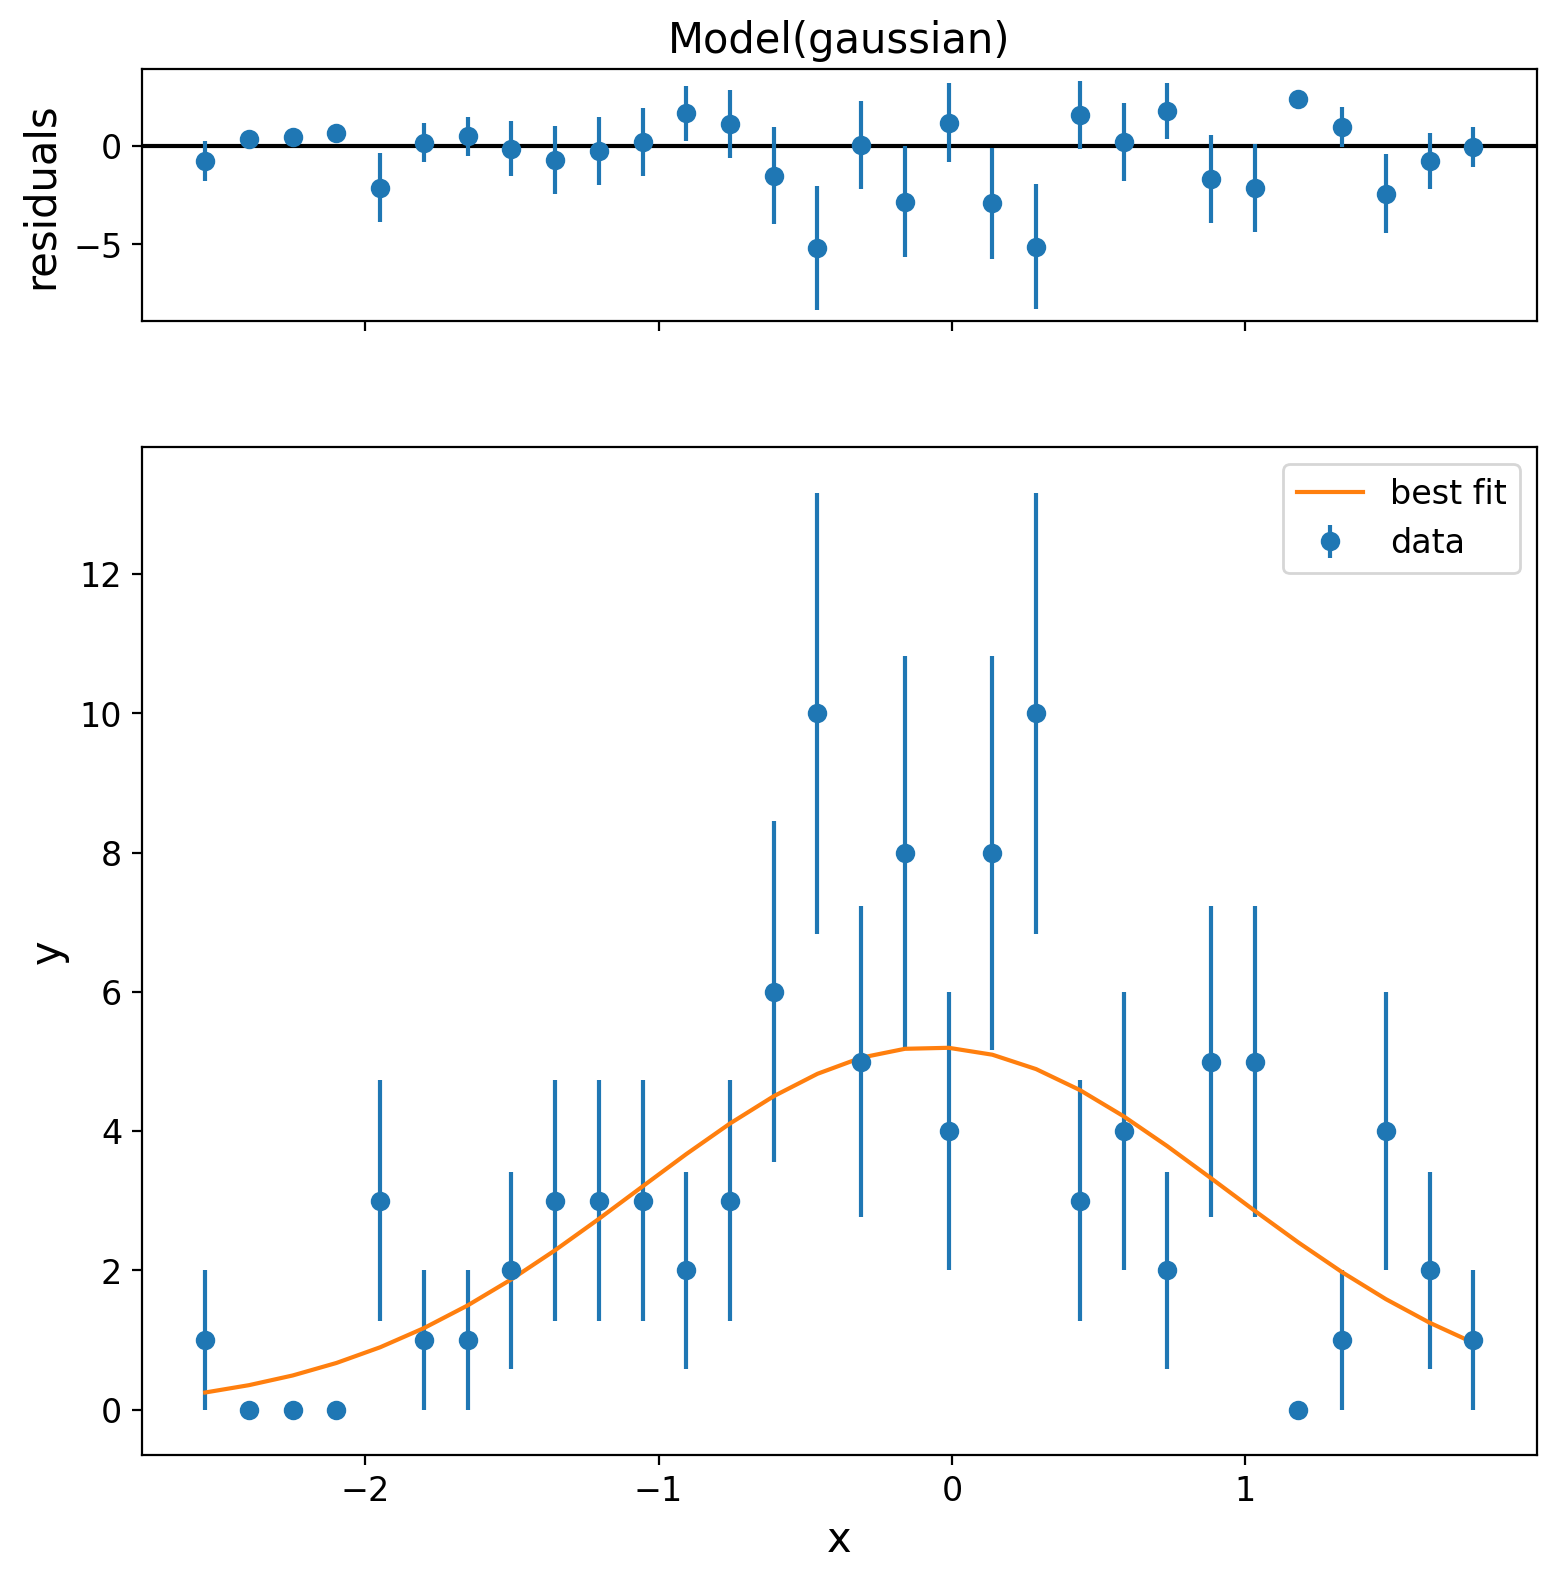

In [36]:
#>>>RUN: L10.5-runcell01

#with Bayesian, we hypothesize a Gaussian and fit it
from lmfit.models import GaussianModel

np.random.seed(42)

#randomly sample 100 events from a Gaussian
lN=100
samples = np.random.normal(0,1,lN)
#make a histogram
count, bins, ignored = plt.hist(samples,30)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
#poisson unc.
weight=1./np.sqrt(count)
weight[weight==float('+inf')] = 0
plt.show()

#Now we can consider two ways to interpret the data
def frequentist(iBins,iCount,weight): #fit a Gaussian floating all parameters
    model = GaussianModel()
    params = model.make_params(center=2, amplitude=1, sigma=1)
    result = model.fit(iCount, params, x=iBins,weights=weight)
    result.plot()
    print(result.fit_report())


frequentist(binscenters,count,weight)


<h3>Bayesian Approach</h3>

Next, we use the Bayesian approach with a prior that is a Gaussian centered at 2 (note this is the incorrect prior, which we are using on purpose). We will fix this value and try to force the fit.

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 30
    # variables        = 1
    chi-square         = 82.2565452
    reduced chi-square = 2.83643259
    Akaike info crit   = 32.2593674
    Bayesian info crit = 33.6605648
    R-squared          = -1.09067665
[[Variables]]
    amplitude:  6.63465814 +/- 2.65268506 (39.98%) (init = 1)
    center:     2 (fixed)
    sigma:      1 (fixed)
    fwhm:       2.35482000 +/- 0.00000000 (0.00%) == '2.3548200*sigma'
    height:     2.64684578 +/- 1.05826828 (39.98%) == '0.3989423*amplitude/max(1e-15, sigma)'


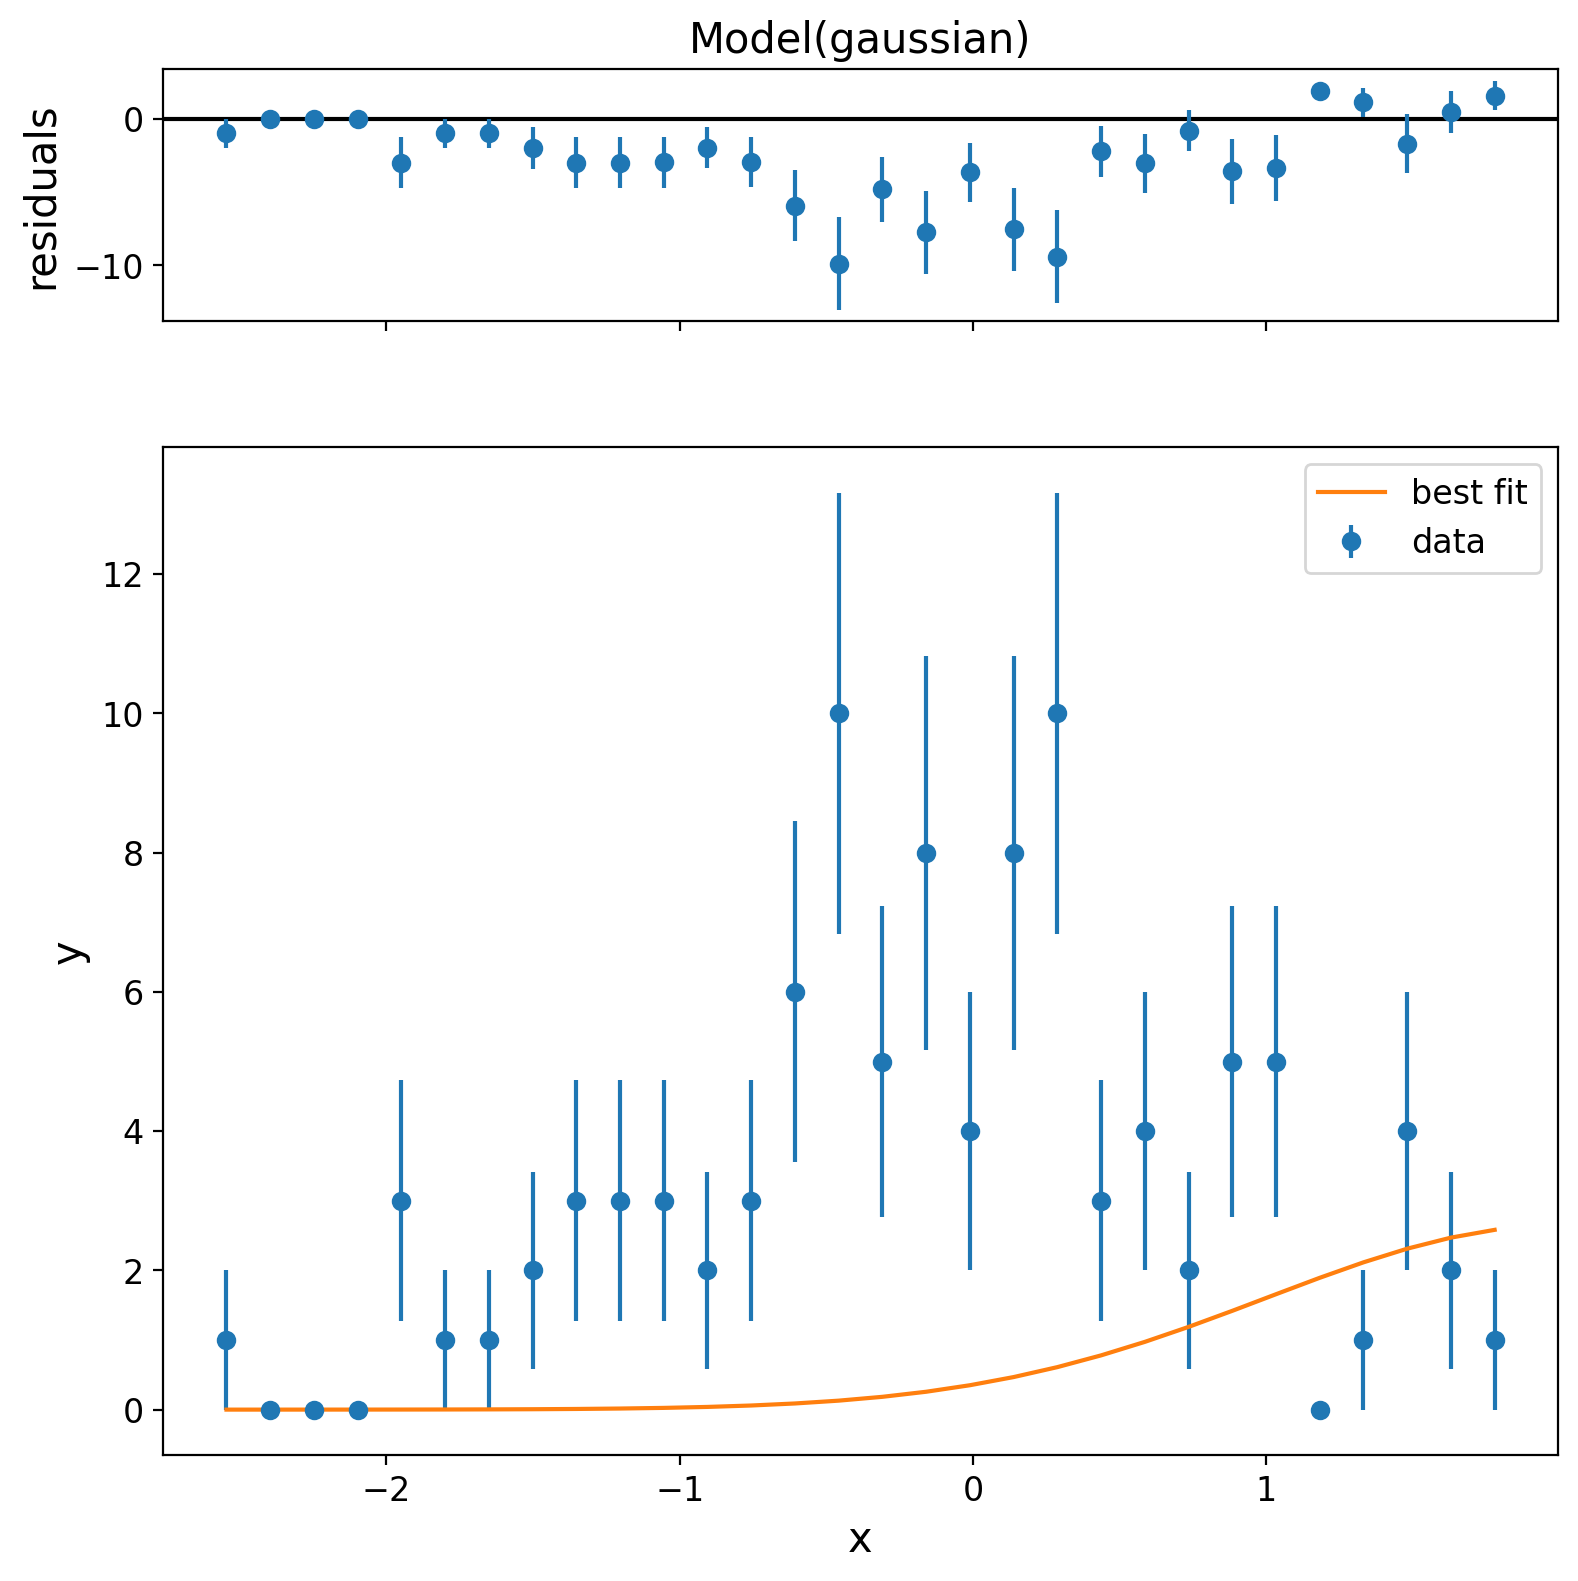

In [37]:
#>>>RUN: L10.5-runcell02

np.random.seed(42)

def bayesianBad(iBins,iCount,weight):#fit a gaussian fix the mean and sgima
    model = GaussianModel()
    params = model.make_params(center=2, amplitude=1, sigma=1)
    params['center'].vary=False
    params['sigma'].vary=False
    result = model.fit(iCount, params, x=iBins,weights=weight)
    result.plot()
    print(result.fit_report())

bayesianBad(binscenters,count,weight)

**Frequentist:** From the example shown above, what you see is that in the frequentist scenario, we just fit the data distribution and extract the parameters. In the frequentist approach, the data is key, and so if our $\chi^{2}$ is good for our fitted model, we can declare success.

**Bayesian:** In the Bayesian approach, we need to reconcile our prior with our observed data. If our prior is that our data should behave as a Gaussian with a mean of 2, and we try to fit it to the data, you see there is not a very good $\chi^{2}$ value, and the fit is clearly way off.

<h3>Modifying the Model</h3>

To reconcile our poor quality Bayesian fit, what we need to do is modify our model so that we can actually go from our prior to our fitted function. To do this, we need to insert a new prior. In this case, our prior will still be a Gaussian but with an unknown mean, so that we allow the mean to vary in the fit. Let's write this down.  

$$
\begin{eqnarray}
 P\left(\mathcal{H}=x\right|\mu,\sigma) & = & \mathcal{N}(x,\mu=2,\sigma=1) \\
 P\left(\mathcal{H}=\mu\right|\sigma) & = & \frac{1}{b-a}~\forall~\mu~\in~[a,b] \\
                               & = & 0~~~~~~~~~\forall~\mu~\notin~[a,b]
\end{eqnarray}
$$

All we are saying here is that $\mu$ can now vary between a and b. Let's now fit the data with this new approach. To do this, we are going to use a new feature in `lmfit`. We will use the function `lmfit.minimize` and feed it a modified loss function, which we define as `resid` (aka the residual function). We will use the likelihood as our loss function.

Additionally, we will add another constraint into the fit. In particular, we will add a parameter $\Delta_{\mu}$, which we call the bias, such that the loss and $\mu$ will be written as:

$$
\begin{eqnarray}
\mu_{\rm new} & = & \mu -\Delta_{\mu} \\
\mathcal{L}_{\rm new} & = & \mathcal{L} + 0~\forall~\mu~\in~[a,b] \\
                      & = & \mathcal{L} + \inf~\forall~\mu~\notin~[a,b]
\end{eqnarray}
$$

In this case, we will just use a really large number to approximate infinity, and allow the mean to vary by $\pm3$.

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 20
    # data points      = 31
    # variables        = 2
    chi-square         = 19.0217922
    reduced chi-square = 0.65592387
    Akaike info crit   = -11.1404596
    Bayesian info crit = -8.27248523
[[Variables]]
    amplitude:  5.21735771 +/- 0.47032695 (9.01%) (init = 1)
    center:     2 (fixed)
    sigma:      1 (fixed)
    fwhm:       2.35482000 +/- 0.00000000 (0.00%) == '2.3548200*sigma'
    height:     2.08142468 +/- 0.18763331 (9.01%) == '0.3989423*amplitude/max(1e-15, sigma)'
    deltamu:    2.06698338 +/- 0.10471289 (5.07%) (init = 0)


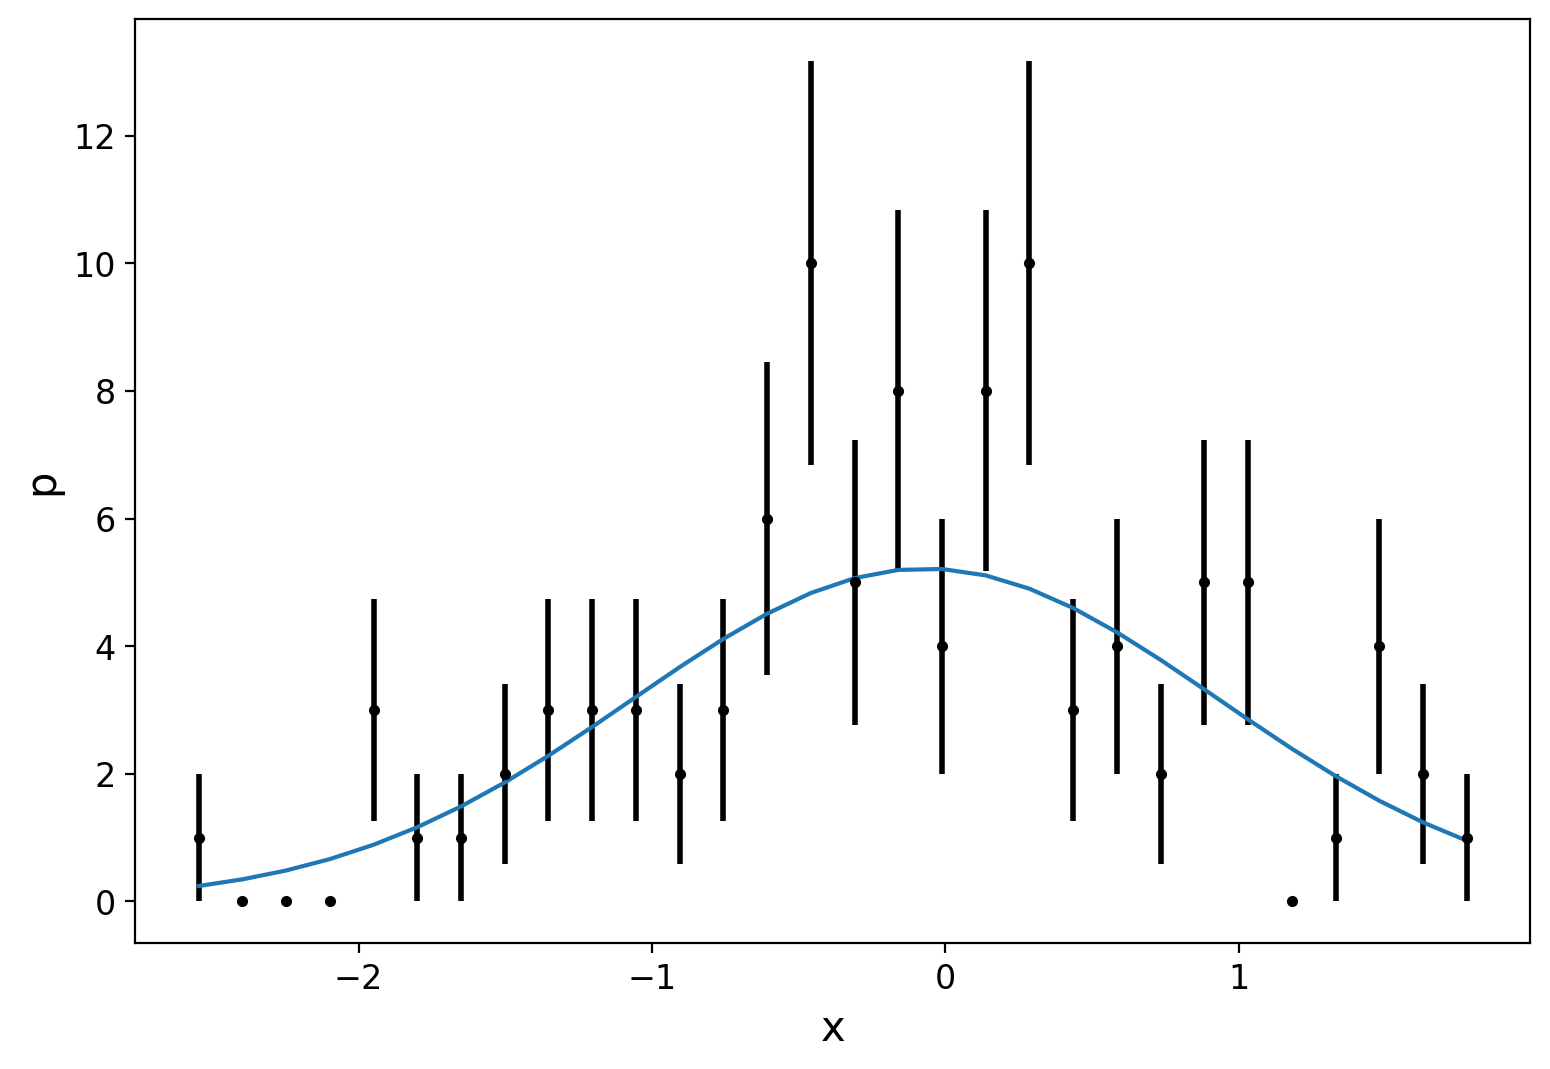

In [38]:
#>>>RUN: L10.5-runcell03

np.random.seed(42)

import lmfit
#here is our modified function
def gauss(x, amp, mu, sigma,dmu):
    return amp * np.exp(-(x-mu+dmu)**2 / (2.*sigma**2))

#now we define our loss we want to minimize
def resid(params, x, ydata,weights):
    mu    = params['center'].value
    sigma = params['sigma'].value
    amp   = params['amplitude'].value
    dmu   = params['deltamu'].value
    lossshift=0
    if abs(dmu) > 3:
        lossshift=1e32
    y_model= gauss(x,amp,mu,sigma,dmu)
    residarr = (y_model - ydata)*weights
    #now append our constraint to the loss
    residarr = np.append(residarr,lossshift)
    return residarr

def bayesianGood(iBins,iCount,weights,initial=2):
    model = GaussianModel()
    params = model.make_params(center=initial, amplitude=1, sigma=1)
    params['center'].vary=False
    params['sigma'].vary=False
    params.add("deltamu", value=0.0, min=-10, max=10) #Our new line of code
    result = lmfit.minimize(resid, params, args=(iBins, iCount,weights))
    lmfit.report_fit(result)
    #Now we plot it.
    plt.errorbar(iBins, iCount,np.sqrt(iCount), lw=2,fmt=".k", capsize=0)
    plt.plot(binscenters,gauss(binscenters,result.params['amplitude'].value,result.params['center'].value,result.params['sigma'].value,result.params['deltamu'].value))
    plt.xlabel("x")
    plt.ylabel("p")
    plt.show()

bayesianGood(binscenters,count,weight)



<a name='exercises_10_5'></a>     

| [Top](#section_10_0) | [Restart Section](#section_10_5) | [Next Section](#section_10_6) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-10.5.1</span>

Run the above Bayesian good fit, centering the mean at an incorrect value of 1 and then the correct value 0 (this can be set using the `initial` parameter in the function).

What is the bias on mu (i.e., `deltamu`) in each case? Is it significant? Report your answer as a list of two numbers with precision 1e-2: `[deltamu1, deltamu0]`.


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 23
    # data points      = 31
    # variables        = 2
    chi-square         = 19.0217922
    reduced chi-square = 0.65592387
    Akaike info crit   = -11.1404596
    Bayesian info crit = -8.27248523
[[Variables]]
    amplitude:  5.21735771 +/- 0.47032693 (9.01%) (init = 1)
    center:     1 (fixed)
    sigma:      1 (fixed)
    fwhm:       2.35482000 +/- 0.00000000 (0.00%) == '2.3548200*sigma'
    height:     2.08142468 +/- 0.18763331 (9.01%) == '0.3989423*amplitude/max(1e-15, sigma)'
    deltamu:    1.06698338 +/- 0.10471280 (9.81%) (init = 0)


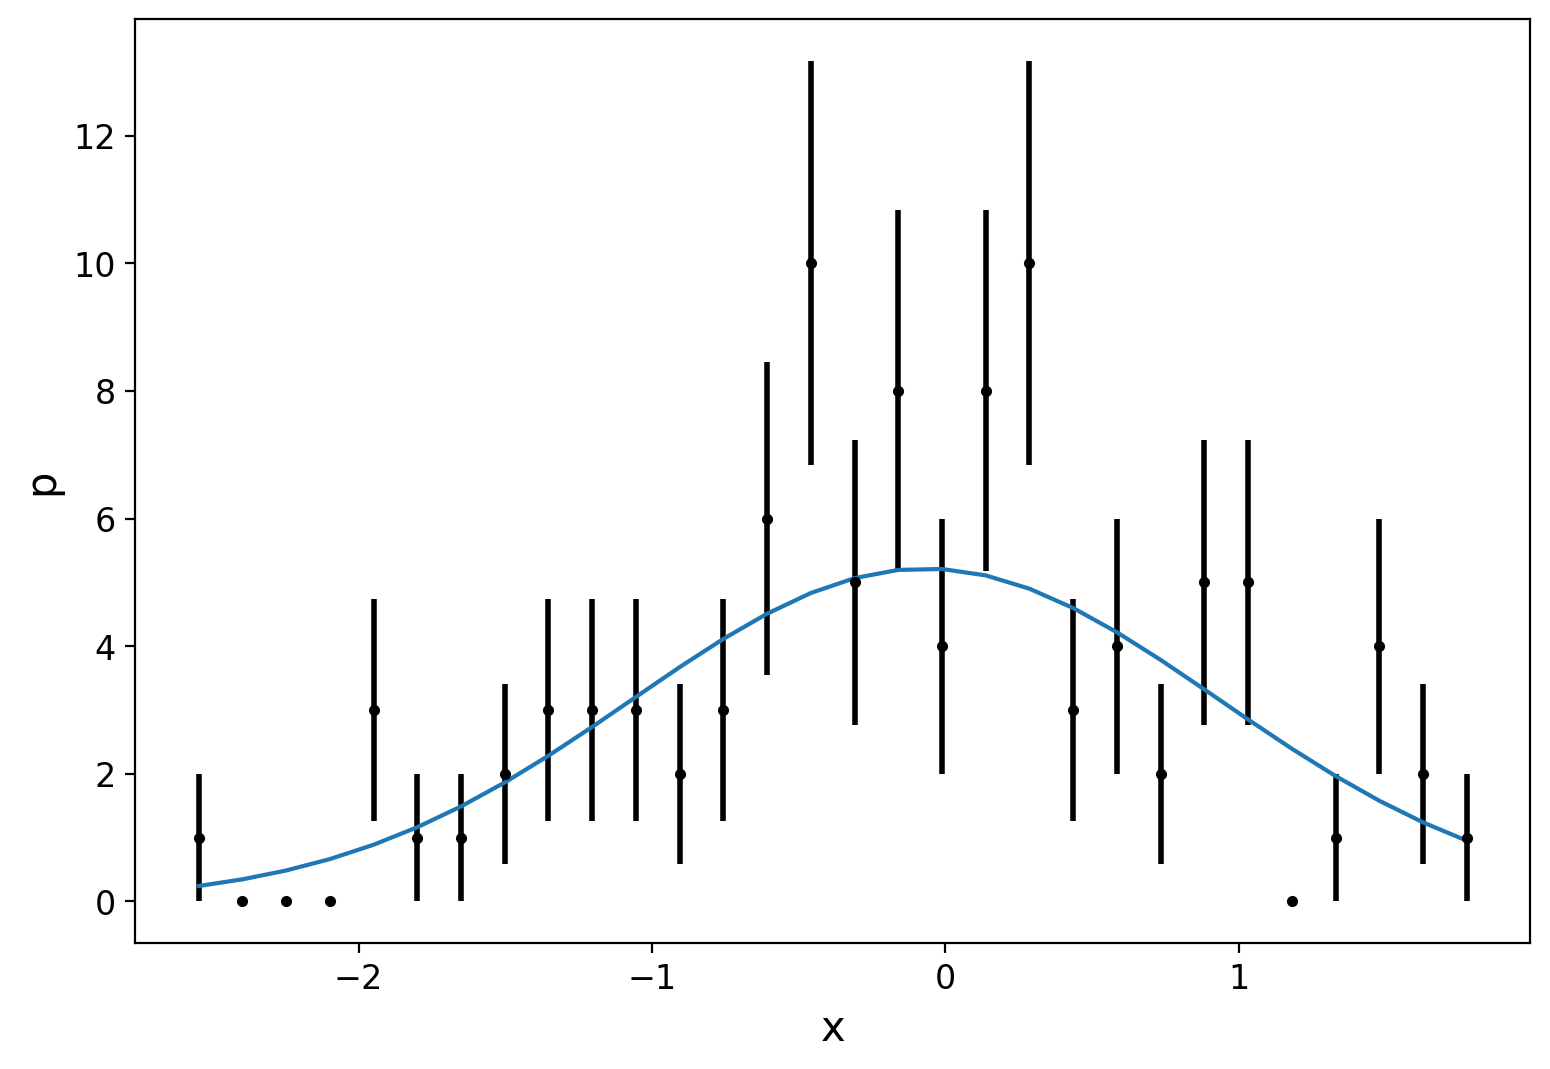

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 31
    # variables        = 2
    chi-square         = 19.0217922
    reduced chi-square = 0.65592387
    Akaike info crit   = -11.1404596
    Bayesian info crit = -8.27248523
[[Variables]]
    amplitude:  5.21735771 +/- 0.47032697 (9.01%) (init = 1)
    center:     0 (fixed)
    sigma:      1 (fixed)
    fwhm:       2.35482000 +/- 0.00000000 (0.00%) == '2.3548200*sigma'
    height:     2.08142469 +/- 0.18763333 (9.01%) == '0.3989423*amplitude/max(1e-15, sigma)'
    deltamu:    0.06698337 +/- 0.10471284 (156.33%) (init = 0)


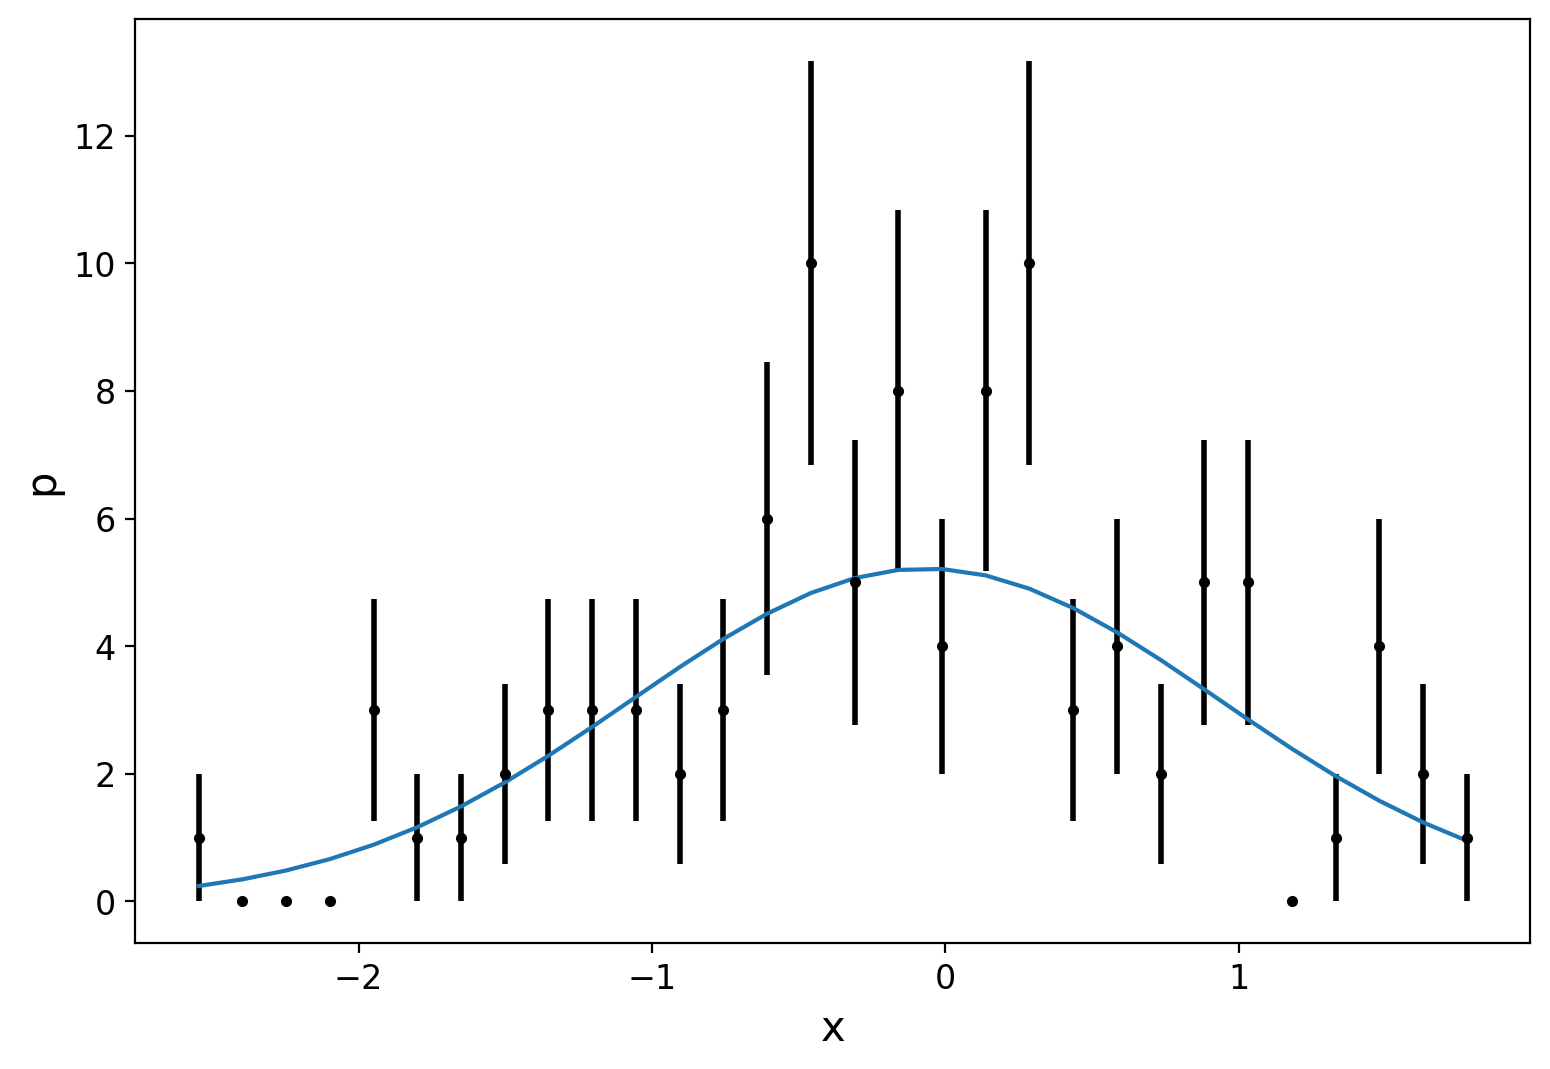

In [39]:
#>>>EXERCISE: L10.5.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

np.random.seed(42)
bayesianGood(binscenters,count,weight, initial=1)
bayesianGood(binscenters,count,weight, initial=0)

<a name='section_10_6'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L10.6 Maximum Likelihood</h2>     

| [Top](#section_10_0) | [Previous Section](#section_10_5) | [Exercises](#exercises_10_6) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.2x+1T2025/block-v1:MITxT+8.S50.2x+1T2025+type@sequential+block@seq_LS10/block-v1:MITxT+8.S50.2x+1T2025+type@vertical+block@vert_LS10_vid6" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Maximum Likelihood</h3>

Let's say we have a sample that is Gaussian distributed, and we want to find the maximum likelihood value of the mean and the resolution of this sample.

**Note:** Here, we return to the more common definition of the likelihood as the probability of an entire dataset for a given prior. This can be found by multiplying the probabilities of each individual data point. For a prior probability that is a Gaussian, this product of probabilities can be written as a single exponential of the sum of exponents for each datapoint, as shown below.

For this sample, we can write the likelihood and log likelihood as:  

$$
\begin{equation}
\mathcal{L}(x|\mu_{i},\sigma_{i}) = \left(\frac{1}{\sqrt{2\pi\sigma^{2}}}\right)^{N} \exp\left(-\sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{2\sigma^{2}}\right)\\
\log\left(\mathcal{L}(x|\mu_{i},\sigma_{i}) \right) =  -\frac{N}{2}\log\left(2\pi\sigma^{2}\right) - \sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{2\sigma^{2}}
\end{equation}
$$

To get the value of $\mu$ that gives the maximum likelihood, we can write:

$$
\begin{eqnarray}
\frac{\partial}{\partial \mu}\log\left(\mathcal{L}(x|\mu_{i},\sigma_{i}) \right) & = & \frac{\partial}{\partial \mu} \left( -\frac{N}{2} \log\left(2\pi\sigma^{2}\right) - \sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{2\sigma^{2}} \right)  = 0\\
& = &  \left( \sum_{i=0}^{N} \frac{(x_{i}-\mu)}{\sigma^{2}} \right)  = 0\\
\sum_{i=0}^{N} (x_{i}-\hat{\mu}) & = & 0 \\
\sum_{i=0}^{N} x_{i} - N \hat{\mu} & = & 0 \\
\end{eqnarray}
$$

This gives us a best fit value for $\mu$, indicated as $\hat{\mu}$ of

$$
\begin{eqnarray}
\hat{\mu} & = & \frac{1}{N} \sum_{i=0}^{N} x_{i}
\end{eqnarray}
$$

Now for $\sigma^{2}$, we can do the same thing, and we get (for a best fit $\hat{\sigma}^{2}$):  

$$
\begin{eqnarray}
\frac{\partial}{\partial \sigma^{2}}\log\left(\mathcal{L}(x|\mu_{i},\sigma_{i}) \right) & = & \frac{\partial}{\partial \sigma^{2}} \left( -\frac{N}{2} \log\left(2\pi\sigma^{2}\right) - \sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{2\sigma^{2}} \right)  = 0 \\
& = & \left( -\frac{N}{2\sigma^{2}} +  \sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{2\sigma^{4}} \right) \\
0 & = & \left( -N +  \sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{\hat{\sigma}^{2}}\right) \\
\hat{\sigma}^{2} & = & \frac{1}{N} \sum_{i=0}^{N}(x_{i}-\mu)^2  
\end{eqnarray}
$$

Now, none of this is a big surprise. The best fit for the mean and variance of a fitted Gaussian distribution is the mean and variance of the data. However, this derivation shows you the thought process that is undergone when trying to construct a maximum likelihood estimator of a sample.



<a name='exercises_10_6'></a>   

| [Top](#section_10_0) | [Restart Section](#section_10_6) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-10.6.1</span>

Which of the following statements best explains why we maximize the likelihood function in statistical inference?

A) To obtain estimates of unknown parameters based on observed data\
B) To minimize the sum of squared errors between the predicted and actual values\
C) To test the hypothesis that the data was generated by a particular model\
D) To calculate the mean and variance of the data
